<a href="https://colab.research.google.com/github/Duoogle/Boston-Housing-Anaylsis/blob/master/Seismic_Crew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Title:  Regularized Ill Posed Seismological Tomography**
---


In [ ]:
# Bai Jaitrong       -  Lead Analyst, Communicator, Programmer, Manager.
# Annie Huppenthal   -  Lead Programmer, Communicator, Analyst, Manager.
# Jeramia Valentine  -  Project Manager, Communicator, Programmer, Analyst.

# Contributions
---

**Bai**, as the Lead Analyst, ensured seamless integration of equations and mathematical analysis with the computational code. His expertise was crucial in refining mathematical models, validating calculations, and resolving discrepancies. Working extensively with Annie, he worked on translating Pawan Bharadwaj's [Ray Tomography Julia code](https://pawbz.github.io/Interactive-Seismology.jl/raytheory/ray-tomography/) to Python and reconciled theoretical formulations with code implementation , while collaborating closely with Jay to convey logic, analysis, and maintain team alignment. Bai’s analytical skills were invaluable to the project, enhancing both the code’s functionality and the mathematical depth. In addition to his technical contributions, Bai played a key role in conveying difficult analysis to Jay to aid in writing the final notebook and coordinated meetings with our sponsor, ensuring clear communication and alignment with project goals.


**Annie**, as the Lead Programmer, played a critical role in translating the Julia code into Python, a task that often required more than a direct 1-to-1 mapping. While some conversions were straightforward, much of the code demanded significant syntax and logic modifications, ultimately evolving into our own unique implementation—thanks to Annie’s expertise. She maintained constant communication with the team, ensuring alignment on code structure, functionality, and purpose. Annie also meticulously commented the code, verifying that all equations and logic flowed seamlessly with Bai’s analysis and the foundational logic from previous group projects. Additionally, she assisted in writing sections of the notebook’s final text, providing guidance to Jay for the final wording.


**Jeramia**, as the Project Manager, created all essential documentation for coding, meetings, minutes, etc., ensuring smooth collaboration through constant communication and real-time coding updates. Jeramia secured communication with a United States Geological Survey (USGS) geophysicist, who provided valuable real-world 3D seismological data for the project. In addition to his project management responsibilities, he worked closely with Bai on the mathematical analysis and collaborated with Annie to provide insightful contributions that enhanced the code. Jeramia's primary focus was refining the structure of the final notebook, improving the clarity of syntax, aesthetics, and overall wording across all sections. He credits the success of the project to the significant contributions of Bai and Annie, whose combined expertise and teamwork, in collaboration with Jeramia's input, resulted in a polished and cohesive final product.

---

# Abstract
---

This study investigates the linear application of seismic rays in Python, translating computational models from Julia to analyze parameter variations for improved accuracy. By defining ray paths, calculating travel times, and estimating true values, we assess the impact of different parameters on seismic wave propagation.

Singular value decomposition and Hessian matrix analysis are employed to gain insights into data sensitivity and inversion stability. Our approach refines seismic imaging techniques, providing a robust computational framework for geophysical applications. The findings contribute to enhancing the interpretation of seismic data, supporting more precise subsurface mapping in geotechnical explorations.

---

# Introduction
---

Seismic imaging plays a crucial role in geophysics, aiding in subsurface exploration for resource extraction, environmental studies, and hazard assessments. The motivation for this project stems from the need to refine computational techniques for modeling seismic ray propagation, ensuring more accurate interpretations of subsurface structures. Historically, seismic modeling has relied on various numerical methods, including finite-difference and ray-based approaches, each with its own strengths and limitations.

This project is particularly significant for stakeholders in geophysical exploration, energy sectors, and hazard mitigation, where precise seismic imaging is essential. By improving seismic ray path calculations and enhancing the stability of inversion techniques through singular value decomposition and Hessian matrix analysis, we contribute to reducing uncertainty in subsurface modeling. The results of this study provide a refined computational approach, ultimately benefiting industries reliant on accurate geological assessments.

---

# Methods
---

## Theoretical Framework

### Seismic Tomographical Theory Analysis

Using a starting model of the Earth's subsurface structure and properties, a forward problem can be used to model the earth. In seismic modeling, the physical properties of the waves are used to predict the observation by using the following equation:

$$ d = F(m) $$

**Where:**  

$d$: data (**unknown**)  
$F$: forward problem function  
$m$: the given model  

Whereas, the inverse problem uses the observations to predict the Earth's structure. The technique is a combination between the physical properties of the waves and a linear or non-linear inversion technique. The cornerstone for any tomographic method relies on the linear equation below:

$$ d = Gm + e $$


It is the relationship between the observed data, source, and medium paramters.

**Where:**

$d$: input data  
$G$: matrix coefficient (**unknown**)    
$m$: model parameters represent the subsurface velocity ($v$), such as slowness $(1/v)$\
$e$: error (*noise*)

* The observed data $d_{obs}$ and the starting model $m_o$ for a given area can be used to predict how well the initial model can estimate the observed data by analysising the difference between $d_{obs} - g(m_o)$.

* The inverse problem is then used to try to minimize the difference between the two ([SEG wiki](https://wiki.seg.org/wiki/Seismic_tomography)).

---

## Mathematical Analysis


###1. **Equations:**

* **Equation 42 (Rawlinson et al.):**
$$ T = \int_S ^R s \ dl,$$

    **Where:**  

     $T$: traveltime of a ray path between source $S$ and receiver $R$.  
     $s$: slowness ($\frac{1}{v}$), a reciprocal of the wave velocity $v$.  
     $l$: ray path length.
     
    \
* **Given Project Equation:**
$$ d_i = \int_{\theta=0} ^ 1 m(x,z) \sqrt{dx^2 + dz^2}\large |_{(x,z)=(-1000,\ \large s_i)(1 - \theta) \ + \ (1000,\ \large r_i) \ \theta} $$

    **Where:**

    $d_i$: traveltime of the $i^{th}$ ray.  
    $m(x,z)$: slowness ($\frac{1}{v}$), a reciprocal of the wave velocity $v$, and parameterization of $s.$\
    $\sqrt{dx^2 + dz^2}$: distance $i^{th}$ ray traveled, and parameterization of $dl$.\
    $x(\theta)$: horizontal coordinate.  
    $z(\theta)$: vertical coordinate (depth).

---

###2. **Equation 42 Relationship to Given Project Equation:**

* Both equations represent the travel time, or integrated model property along a raypath from a source $s_i$ to a receiver $r_i$.

* Both equations describe how travel times are computed through a model of slowness.

* Both integrals are line integrals of slowness along the raypath.

* **Assumptions:**
    * ray paths are straight lines (no bending), **defined parametrically from (-1000, $z = s_i$) to (1000, $z = r_i$) in our project.*
    * 2-D tomography **note: (Eq 42 can be used for 3-D tomography).*
    * The slowness $m(x,z)$ [ $s$ in equation 42 ] carries continuously along the path, and is the unknown variable.

*Note: Calculating traveltimes using straight rays may not be physically accurate if refraction or more complex structures are present.*

---

###3. **Homogeneous Case:**

$$ d_i = \int_{\theta=0} ^ 1 m(x,z) \sqrt{dx^2 + dz^2}\large |_{(x,z)=(-1000,\ \large s_i)(1 - \theta) \ + \ (1000,\ \large r_i) \ \theta} $$
\
\
**Where:**

* $m(x,z) = m(0,0), \ for \ all\  \theta$.\
$$
\therefore d_i = m(0,0) \int_{\theta = 0} ^1 \sqrt{dx^2 + dz^2} \large |_{(x,z)=(-1000,\ \large s_i)(1 - \theta) \ + \ (1000,\ \large r_i) \ \theta.}
$$

* $x= -1000 \ (1-\theta) \ + \ 1000 \ (\theta).$  
  $dx= 2000 \ d\theta$.  
  
* $z= s_i(1-\theta)\ + \ r_i \theta$.   
  $dz = (r_i - s_i)\ d \theta$.         

* $\therefore \sqrt{dx^2 + dz^2} = \sqrt{(2000)^2 + (r_i - s_i)^2} \ d\theta$.  
\
\
\begin{align}
    d_i &= m(0,0) \int_{\theta = 0} ^1 \sqrt{(2000)^2 + (r_i - s_i)^2} \ d\theta \\
    d_i &= m(0,0) \sqrt{(2000)^2 + (r_i - s_i)^2} \int_{\theta = 0} ^1 \ d\theta \\
    traveltime\ of\ the\ i^{th}\ ray &= m(0,0) \sqrt{(2000)^2 + (r_i - s_i)^2}. \\ \\
\end{align}

---

###4. **Spatial Discretization Heterogenous Case (continuous to discrete intervals):**

\begin{align}
        \int_{\theta=0}^1 m(x,z) \sqrt{dx^2 + dz^2} \large |_{(x,z)=(-1000,\ \large s_i)(1 - \theta) \ + \ (1000,\ \large r_i) \ \theta} \\
        &\approx\\ d_{obs_i} &= \sum_{j=0}^{20 \times 20 - 1} G_{ij} \ m_{true,j}
\end{align}

**Where:**

$d_{obs_i}$ = $i^{th}$ ray travel time.\
$G_{ij}$ = length of ray $i$ intersected with cell $j$.\
$G_{ij}$ = $\sqrt{\Delta x^2 + \Delta z^2.}$\
$m(x,z)$ = $m_{true,j.}$

##### **Assumptions:**

* sources and receivers are on the opposing ends and edge of discretized earth model ( a grid of equal sized cells ).
* ray path from source to receivers are straight lines, no bending allowed.
* $d_{obs_i}$ and $G_{ij}$ are known.
* $m_{true,j}$ is a sampling like a riemann's sum, true integral of a piecewise fxn, midpoint rule used, **Simpson's Rule allowed as well.**
* Relating to Pawan $G_{ij}$ is constructed by intersecting each ray with the grid cells, ***each entry of $G_{ij}$ is the length of the intersection of ray $i$ with cell $j$.***

\

Refering back to $G_{ij}$ = $\sqrt{\Delta x^2 + \Delta z^2.}$\, which is true only if the ray is defined by $(s_i,r_i)$ intersects the grid cell defined by

\begin{equation}
  (x_j,z_j) = (-1000, -1000) + (⌊\frac{j}{n_z}⌋\Delta x,(j mod n_z) \Delta z) , j = 0,1,...n_xn_z-1
\end{equation}

  exactly through 2 of its diagonally opposite cell corners where $⌊t⌋∈ ℤ $

---

###5. **Show that if the ray intersects exactly two diagonally opposite corners, then it implies $\frac{(r_i−s_i)}{2000}=±\frac{\Delta z} {\Delta x}.$**

- $(x_j, z_j)$ forms a regular lattice, a repeating arrangement of points in a space, such as a plane.
- If the ray $(s_i, r_i)$ passes exactly through two diagonally opposite corners of a cell, it MUST have a slope that matches the diagonal of the cell.
- A grid cell has a width of $\Delta x$ and a height of $\Delta z$.
- The diagonal slope is $\frac{\Delta z}{\Delta x}$.
- The condition states that the difference in $r_i$ and $s_i$ over a fixed step of 2000 must be proportional to this slope of $\frac{\Delta z}{\Delta x}$ therefore leading to $\frac{(r_i−s_i)}{2000}=±\frac{\Delta z} {\Delta x}$

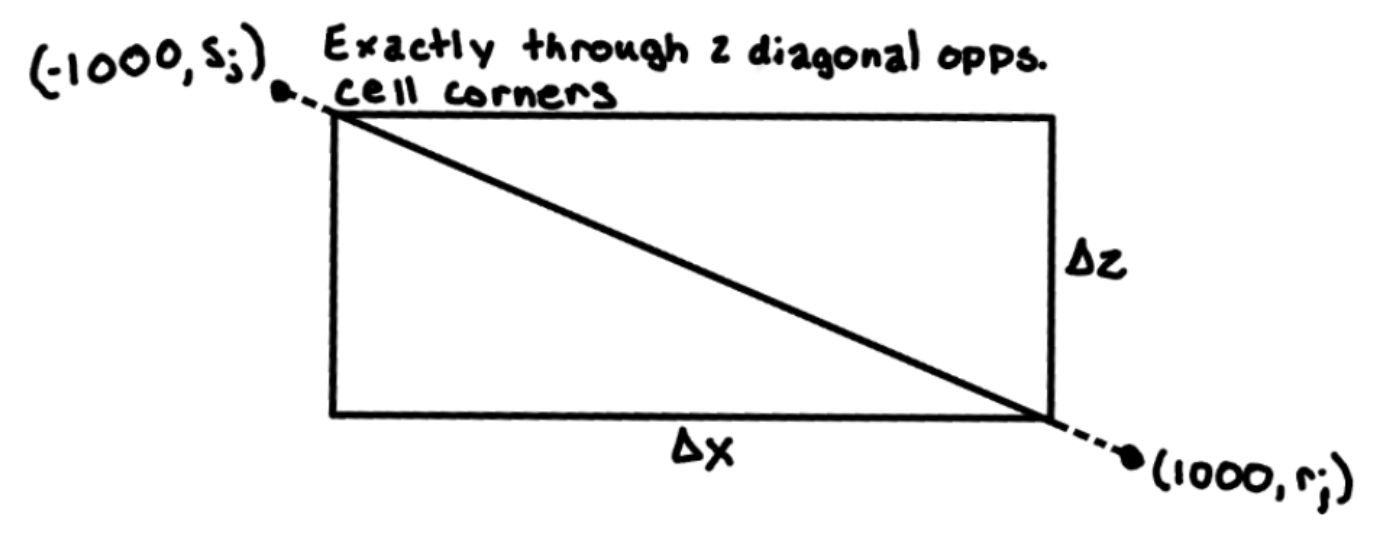


###6. **What would $G_{ij}$ be in various cases?**
Case 1: $z_j ≲ r_i = s_i < z_{j+1}$
- ray just touches the grid cell at an edge rather than through a diagonal.
- Since that happen with the ray not going through a full diagonal, the interaction is limited to only part of the cell therefore $G_{ij}$ is simply the horizontal grid step size $G_{ij} = \Delta x$
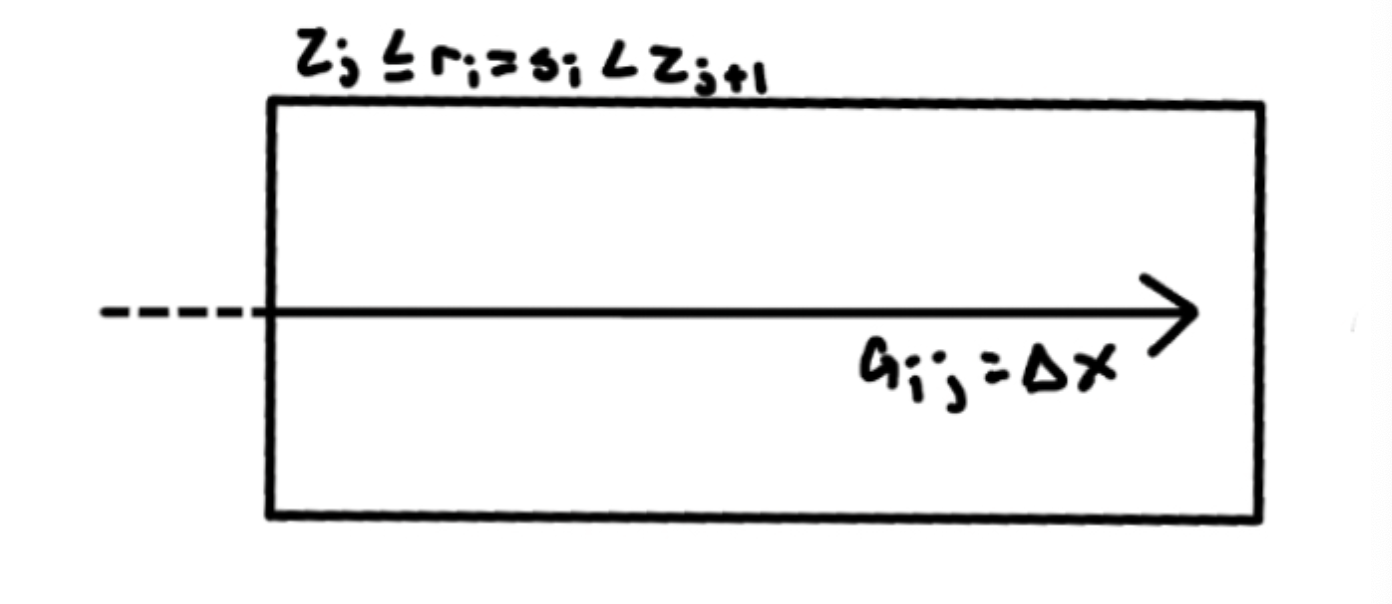

Case 2: $r_i = s_i < z_j$
- ray will start below the grid cell and never enter it.
- No intersection means $G_{ij} = 0$
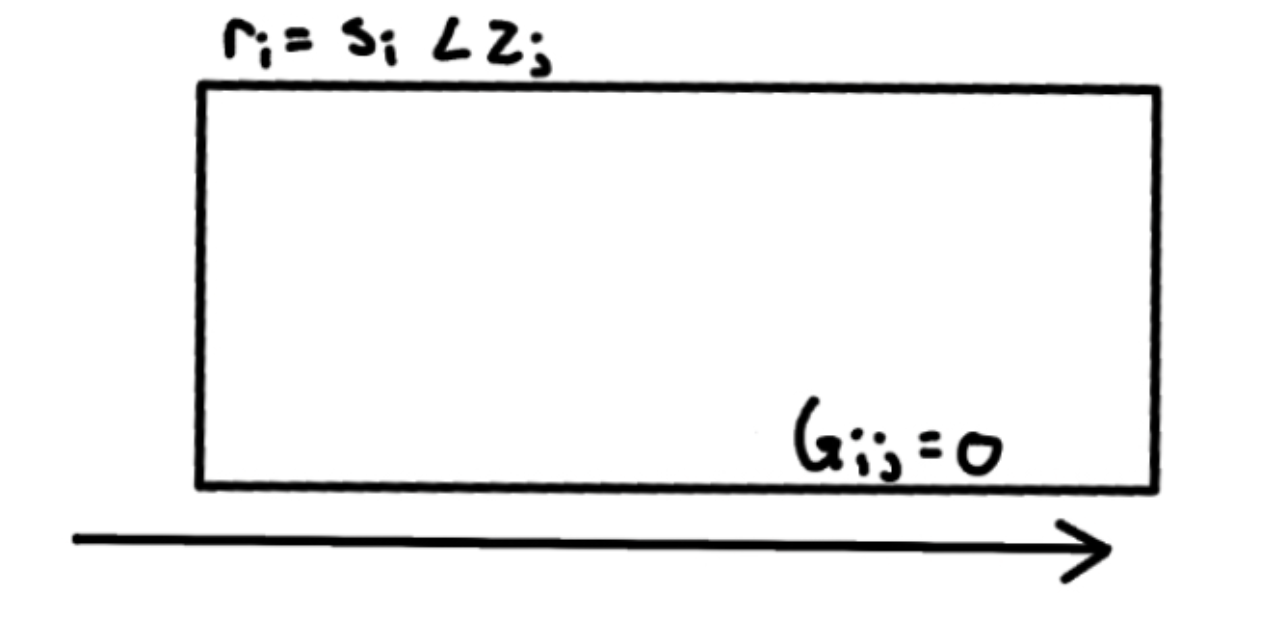

Case 3: $z_{j+1} ≲ r_i = s_i$
- Above the grid cell. At the top or above the boundary.
- No interaction occurs if $z_{j+1} = r_i = s_i$ so $G_{ij} = 0$
- $G_{i,j+1} = \Delta x$
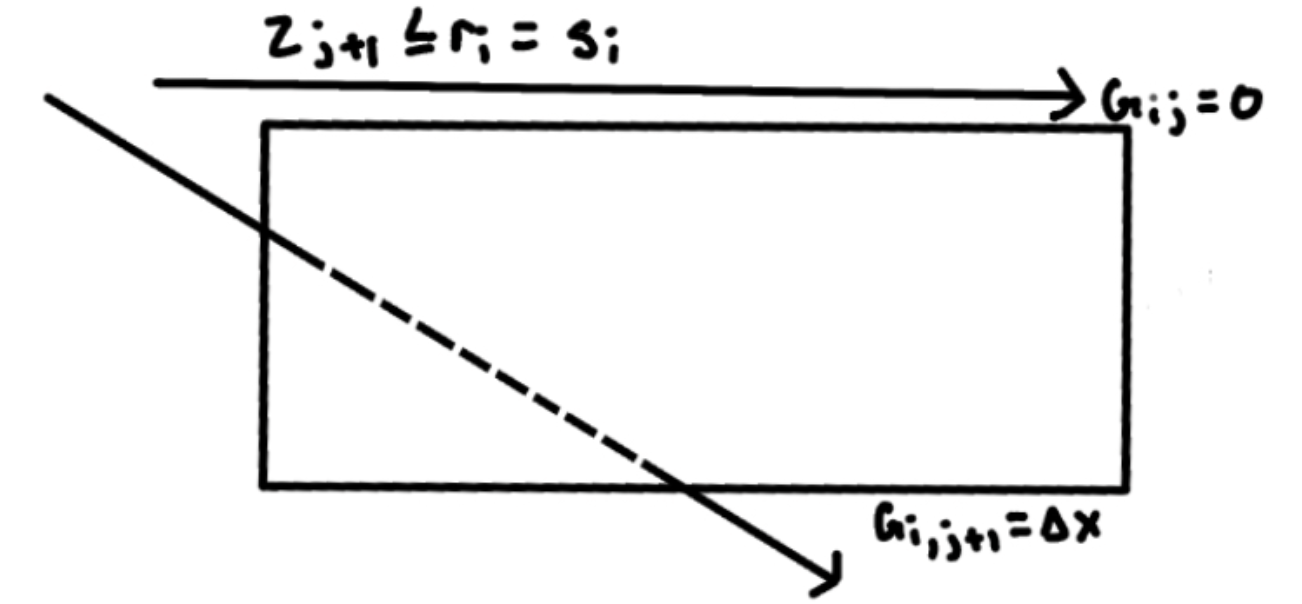

---

###7. **What would $G_{ij}$ be in more general cases?**
In more general cases, $G_{ij}$ represents the length of the segment where the ray intersects the grid cell, which depends on the orientation of the ray.

- Using find_interest will determine where the ray enters and exits the grid cell.

- Find_length_in_cell will compute the path length of the ray within a cell.

Depending on the geometry of intersection: if a ray fully cross the cell $G_{ij} = \sqrt{\Delta x^2 + \Delta z^2}$. If a ray enters and exits through adjacent edges, $G_{ij}$ is simply the segment length within the cell.

---

###8. **Good Solution For $m_{\widehat{true,j}}$ Assuming Homogeneity [ $m(0,0)$ ] and Spatial Discretization:**

\begin{align}
        d_{obs_i} &= \sum_{j=0} ^{\tiny 20x20 - 1} G_{ij}\ m_{true,j} \\
        &
\end{align}

* rows = ( sources * receivers )

* columns = ($ \frac{2000}{ds})^2 $

\

### $\therefore$ A Good 2-D Solution For $m_{\widehat{true,j}}$ Assuming Homogeneity [ $m(0,0)$ ] and Spatial Discretization Is:

**\begin{align}
    m_{\widehat{true,j}} &\approx \sum \left\{ G^T \left( G G^T \right)^{-1} d_{obs_i} \right\}.
\end{align}**

\\

---

###9. **1-D Heterogeneous Discretized Case:**

$$\Gamma  = \sum_{i=1}^N s_i \Delta x_i $$

**Where:**

$N$: number of segmentation of ray path (no bending).     
$\Gamma$: total traveltime of the ray (wave) (__known__).  
$s_i$: acoustic slowness ($1/v$) of the $\ i_{th}$ segment (__unknown__).  
$\Delta x_i$: ray length in the $i^{th}$ segment (__known__), where $ i = 1,2,..., N$.

#### Let $N = 2$,

\begin{align*}
    \Gamma =
    \begin{pmatrix}
    \Delta x_1 & \Delta x_2
    \end{pmatrix}
    \begin{pmatrix}
      s_1 \\
      s_2 \\
    \end{pmatrix}
    \end{align*}

\

#### **The Solution for 1-D Heterogenous Discretized Case:**  

\begin{align*}
    \begin{pmatrix}
      s_1 \\
      s_2
    \end{pmatrix} &=
    \begin{pmatrix}
    \Delta x_1 & \Delta x_2
    \end{pmatrix}^T
     \ [\begin{pmatrix}
    \Delta x_1 &\Delta x_2   
    \end{pmatrix}
    \begin{pmatrix}
    \Delta x_1 & \Delta x_2
    \end{pmatrix}^T]^{-1} \Gamma \\  
    &= \begin{pmatrix}
    \Delta x_1 \\
    \Delta x_2
    \end{pmatrix}
    \frac {\Gamma}{\Delta x_1^2 + \Delta x_2^2}
    \end{align*}

\\

#### **The General Solution for "N-Segmentation" of the ray path:**
\begin{align*}
    \begin{pmatrix}
      s_1 \\
      s_2 \\
      ⋅ \\
      ⋅ \\
      ⋅ \\
      s_N
    \end{pmatrix} &=
    \begin{pmatrix}
    \Delta x_1 & \Delta x_2 & \ ... & \Delta x_N
    \end{pmatrix}^T
     \ [\begin{pmatrix}
    \Delta x_1 & \Delta x_2 & \ ... & \Delta x_N
    \end{pmatrix}
    \begin{pmatrix}
    \Delta x_1 & \Delta x_2 & \ ... & \Delta x_N
    \end{pmatrix}^T]^{-1} \Gamma \\  
    &= \begin{pmatrix}
    \Delta x_1 \\
    \Delta x_2 \\
    \ ...      \\
    \Delta x_N
    \end{pmatrix}
    \frac {\Gamma}{\Delta x_1^2\ + \Delta x_2^2\ + \ ...\ +\ \Delta x_N^2}
    \end{align*}

---

###10. **Write down an $s \not = \frac{\Delta x}{\Delta x^T \Delta x} \Gamma$ that is also a solution, such that $s^Ts$ is arbitrarily larger.**

$$s= \frac{\Delta x}{\Delta x^T \Delta x} \Gamma + \lambda v$$

where $\lambda $ is a scaling factor and $v$ is a vector in a hyperplane of $n-1$ dimensional space and orthogonal to $\Delta x$. There are infinitely many of these vectors.

\begin{align}
s^Ts &= (\frac {\Gamma}{\Delta x^T \Delta x} \ \Delta x^T + \lambda v^T)(\frac {\Gamma}{\Delta x^T \Delta x} \ \Delta x + \lambda v) \\
&= (\frac{\Gamma}{\Delta x^T \Delta x})^2 \Delta x^T \Delta x + \frac{\lambda \Gamma}{\Delta x ^T \Delta x} \Delta x^T v + \frac{\lambda \Gamma}{\Delta x^T \Delta x} v^T \Delta x + \lambda^2 v^Tv \\
&=\frac{\Gamma^2}{\Delta x^T \Delta x} + \lambda^2 v^Tv
  \end{align}

---

###11. **Why do we like $ G \hat{m} \ $ in this case?**
Because if we multiply both sides (on the left) by $( G $), then we end up with:

* $G \hat{m} = G G^T (G G^T)^{-1} d$

Since ($ (G G^T)^{-1} $\) is the inverse of ($ G G^T $), they cancel out, leaving:

* $G \hat{m} = d$

which confirms that ($ \hat{m} $) satisfies the equation, given that ($ G G^T $) is a square invertible matrix.

---

###12. **What happens if in reality (by some geological miracle) $ m_{true} = G^T d_s \ $ for some $ d_s ? \ $ Find $d_s$.**

If in reality $m_{\text{true}} = G^T d_s$ for some $d_s$, we need to find $d_s$.  

Given the estimate $\hat{m} = G^T (G G^T)^{-1} d$, we substitute $\hat{m} \ $ in place of $m_{true}$ :
* $m_{\text{true}} = G^T d_s$.  

Comparing with $\hat{m}:$  

* $G^T d_s = G^T (G G^T)^{-1} d$.  

To solve for $d_s$, multiply both sides by $(G^T)^{-1}$, assuming it exists:  

* $d_s = (G^T)^{-1} G^T (G G^T)^{-1} d$.  
* $d_s = I (G G^T)^{-1} d$.

Since $G^T$ is not necessarily invertible, we must check consistency conditions for $d_s$.

---

###13. **If $k = \text{rank}(G) \leq n_r n_s < n_z n_x$, explain why there must be a $p \neq 0$ such that $G p = 0$.**

* Since $k = \text{rank}(G)$, the rank of $G,k,$ is the number of linearly independent columns of $G$.

* However, we are given that $k \leq n_r n_s < n_z n_x$, meaning that $G$ has more columns than its rank.  

* $G$ is a **wide matrix** (more columns than independent rows), which implies that the **null space of $G$ is nontrivial**.

That is, there exists a nonzero vector $p$ such that:  

\begin{align}
G p = 0.
\end{align}

This follows from the **Rank-Nullity Theorem**, which states:  

* $\text{dim}(\text{Null}(G)) = \text{# of columns} - \text{rank}(G).$

* Since $G$ has more columns than its rank, the null space is **at least one-dimensional**, meaning there must exist a nonzero $p$ satisfying $G p = 0$.  

Thus, we have shown that such a $p \neq 0$ must exist.  

---

###14. **If $\ m_{\text{true}} = G^T d_s + p $, how would you answer a request to find $\ p?$**  

* We are given the equation:  

$$
m_{\text{true}} = G^T d_s + p.
$$

* To solve for \( p \), simply rearrange the equation:

$$
p = m_{\text{true}} - G^T d_s.
$$

---

###15. **What happens to the above if $ G G^T $ is not invertible?**

If $ G G^T $ is not invertible, then the expression  

$$
\hat{m} = G^T (G G^T)^{-1} d
$$

**is no longer valid** because $ (G G^T)^{-1} $ does not exist. This occurs when $ G G^T $ is **singular**, meaning that it has **at least one zero eigenvalue** and is not full rank.

\

#### **Why Would $ G G^T $ Be Non-Invertible?**  

$ G G^T $ is an $ m \times m $ square matrix. It is **non-invertible (singular)** if its columns are **linearly dependent**, which happens when $ G $ itself does not have full row rank.  

This typically occurs when:  

1. **Underdetermined System**:  
   - If $ G $ has **more columns than rows** (i.e., if $ n_z n_x > n_r n_s $), then its rows cannot span the full space, leading to **linear dependence** in $ G G^T $.  
   
2. **Redundant Information in $ G $**:  
   - If some rows of $ G $ are **linear combinations** of other rows, then $ G G^T $ will be singular.

\

#### **Consequences of $ G G^T $ Being Non-Invertible**  

1. **No Unique Solution for $ \hat{m} $**  
   - Since $ (G G^T)^{-1} $ does not exist, we **cannot directly compute** $ \hat{m} \ $ using the standard formula.  
   - This means that there are **infinitely many solutions** for $ \hat{m} \ $, or in some cases, no solution at all.

2. **Need for a Generalized Solution: Moore-Penrose Pseudoinverse**  
   - Instead of using $ (G G^T)^{-1} $, we can use the **Moore-Penrose pseudoinverse** $ (G G^T)^+ $, which provides a least-squares solution:

     $$
     \hat{m} = G^T (G G^T)^+ d.
     $$

   - The pseudoinverse $ (G G^T)^+ $ handles singular matrices by computing a solution in the **least-squares sense**, effectively choosing a solution that minimizes $ ||G \hat{m} - d||_2 $.

3. **Potential Need for Regularization**  
   - In practical applications (e.g., seismic inversion, machine learning), we often **regularize** the problem by adding a small term $ \lambda I $ (where \($ I $ ) is the identity matrix):

    - This ensures that $ G G^T + \lambda I $ is always invertible, preventing numerical instability.

   \

     $$
     \hat{m} = G^T (G G^T + \lambda I)^{-1} d.
     $$

   
   - Above is the **dual formation** version, and should be used particularly when $G$ is **"tall"** (more rows than columns).

   \

   - Below is the **dual formation** version, and should be used particularly when $G$ is **"wide"** (more columns than rows).

    $$
     \hat{m} = G^T (G^T G + \lambda I)^{-1} d.
    $$

---

###16. **Finding $ m_0 $ Under the Assumption of Homogeneity**  

We are given that **assuming homogeneity** means that $ m $ takes the form:  

$$
m = (m_0, m_0, \dots, m_0)^T
$$

implies:

$$
m_j = m_0, \forall j=0, \dots, n_x n_z - 1.
$$

This means that every element of $ m_j $ is the same constant $ m_0 $, so we can express it as the averaged estimate over all components, averaging out any irregularities helping to smooth instability in the inverse problem:  

$$
m_0 = \frac{1}{n_x n_z} \sum_j (G^T (GG^T)^{-1} d )_j.
$$

\

From previous results, the estimate for $ m $ when $ G $ was tall (more rows than columns) is:

$$
\hat{m} = G^T (G G^T)^{-1} d.
$$

But, if Tikhonov is necessary to prevent extreme values for $ m_0 $, we replace $ \hat{m} \ $ with $ m_j $, and when $ G $ is wide (more columns than rows), we write $ m_0 $ as follows:

$$
m_0 = \frac{1}{n_x n_z} \sum_j ((G^T G + \lambda I)^{-1} G^T d )_j,
$$

this ensures that the homogeneous model $ m_0 $ is stabilized by regularization, preventing overfitting while maintaining consistency.

---

###17. **SVD & Tikhonov Regularization Analysis**

**Singular Value Decomposition (SVD):** a matrix factorization technique that decomposes a matrix into three simpler matrices. SVD will help to analyze the properties of the matrix G, revealing its rank, null space and condition number.

Looking back at:
$$ d = Gm + e $$

* Rank of G, which is the number of linearly independent columns, is crucial in determining the uniqueness and stability of the solution.
* When G is rank-deficent, the inverse problem becomes ill-posed, leading to non-uniqueness or instability in the solution.

**Tikhonov Regularization:** A technique used to solve ill-posed inverse problems based on prior knowledge of the model, m_0. This will add a penalty term to the least-squares objective function if the solutions deviates too far from m_0, which constrains the solution and improves its stability.

This equation:
$$\hat{m}= (G^T G + \lambda I)^{-1} G^T d$$

Where:
* $\lambda $ is the regularization parameter, controlling the trade-off between fitting the data and minimizing the solution's norm.
* $I$ is the idenity matrix

This ensures that matrix $G^T G + \lambda I$ is invertible, even when $G^T G$ is singular.

There will be 3 $\lambda$:

$\lambda$1, 2, 3 would represent the regularization parameters in the Tikhonov. It is the parameters that controls the trade-off between minimizing the residual error (How well the solution first the data) and minimizing the size or complexity of the solution. Going into the specific:

* $\lambda$1 : relate to the data fitting part of the solution
* $\lambda$2: represents some form of prior knowledge or constraint on the solution (smoothness)
* $\lambda$3: related to the first-order differences in the horizontal and vertical directions, respectively. Would typically used for the first-difference regularization, this encourages smoothness in the solution

$\lambda$ will act as weights that balance the influence of different terms in the problem. Larger lambda values emphasize the regularization term, leading to smoother solutions, while smaller values prioritizing fitting the data more closely.

Therefore, the values was determined through a form of parameter turning to achieve the desired balance between fitting the data and controlling the solution properties.

LAMBDAS ARE IMPORTANT: it controls the behavior of our regularized solution, their values are critical for obtaining meaningful and stable results in our ill-posed problem.

The tikhonov regulation are set with Tikhonov regularized solution and first difference reularization.

In the Tikhonov Regularized Solution, will implements Tiknonov reularization in the spectral domain using the SVD. The solution m̂ is given by:
$$m̂ = Vd_\lambda U^Td$$

where:
* U and V are singular vector matrices from the SVD of G
* d is the data vector
* $d_\lambda$ is a diagonal matrix with elements $d_{ \lambda ,i} = \frac{\sigma_i}{\sigma^2_i+ \lambda^2}$, where $\lambda$1 and 2 is the regularization parameter.

In the First Difference regularization, will function would suggests another form of regularization, to aim to minimize the first difference between adjacent model parameters.

The form to minimize the Tikonov function would be:
$$J(m) = ||Gm-d||^2_2+\alpha ||Lm||^2_2$$

where:
* L is a finite difference operator
* $\alpha$ is the regularizartion paramter

Solution to the minimization problem is:
$$m̂ = (G^TG+\alpha L^T L)^{-1}G^T d$$

Where our equation is a modified version:
$$m̂ = (G^TG + \lambda I)^{-1} (G^T d + \lambda m_0)$$



---


###18. **Matrix Inversion, SVD, and Tikhonov Computational Time Complexity/Cost**

The equation system for seismic tomography can be massive so knowledge of an algorithm's computational efficiency will by very important when deciding on an appropriate algorithm to solve the problem. Based on the time complexity of taking an inverse of a matrix being $O(n^3)$, we decided to use numpy least square solver to solve for our estimated model instead of directly taking the inveres of $(G^TG + \lambda I)$.  

In this section we have provided a high level overview of general methods for quantifying an algorithm's efficiency and perfomance along with time complexities/cost tables for the algorithms we have been exploring.

#### __Quantification Methods__

##### __Flops__
* a method for measuring the amount of work associated with computations. The method entails adding up flops, where one flop is a floating point operation of add, subtract, multiply, or divde.
* In general, the number of flops for a matrix computation is acquired by adding up the number of arithmetic operations tied to the innermost nested statements.

##### __Table of important flops__
source: [matrix Computations, Golub, G.H. et al.](https://math.ecnu.edu.cn/~jypan/Teaching/books/2013%20Matrix%20Computations%204th.pdf)

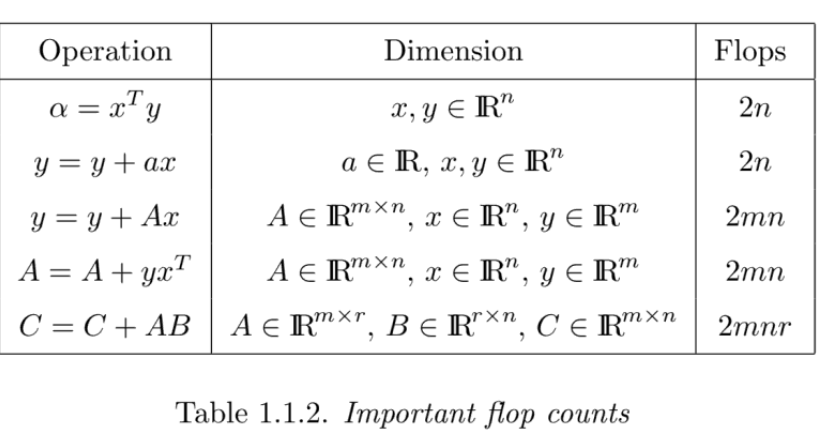

##### __"Big Oh" Notation__
* $O ( \ )$ : Order of function
* Used to measure an algorithms efficiency and performance based on time and space complexity as a function of its input size. In the case of matrices, it is a function of their dimensions.
* It represents a worst-case complexity scenario.
* used when an order-of-magnitude assesment of computation cost estimate is acceptable. For example:

     - dot products: $\large O(n) $
     - matrix - vector producs: $\large O(n^2)$
     - matrix - matrix products: $\large O(n^3)$

* for efficient algorithm with a mixture of the above operation, the focus should be on the operations that makes up the bulk of the computation cost which are the higher order operations ([matrix Computations, Golub, G.H. et al.](https://math.ecnu.edu.cn/~jypan/Teaching/books/2013%20Matrix%20Computations%204th.pdf)).

##### "Big Oh" Chart
source: [FreeCodeCamp](https://www.freecodecamp.org/news/big-o-cheat-sheet-time-complexity-chart/)

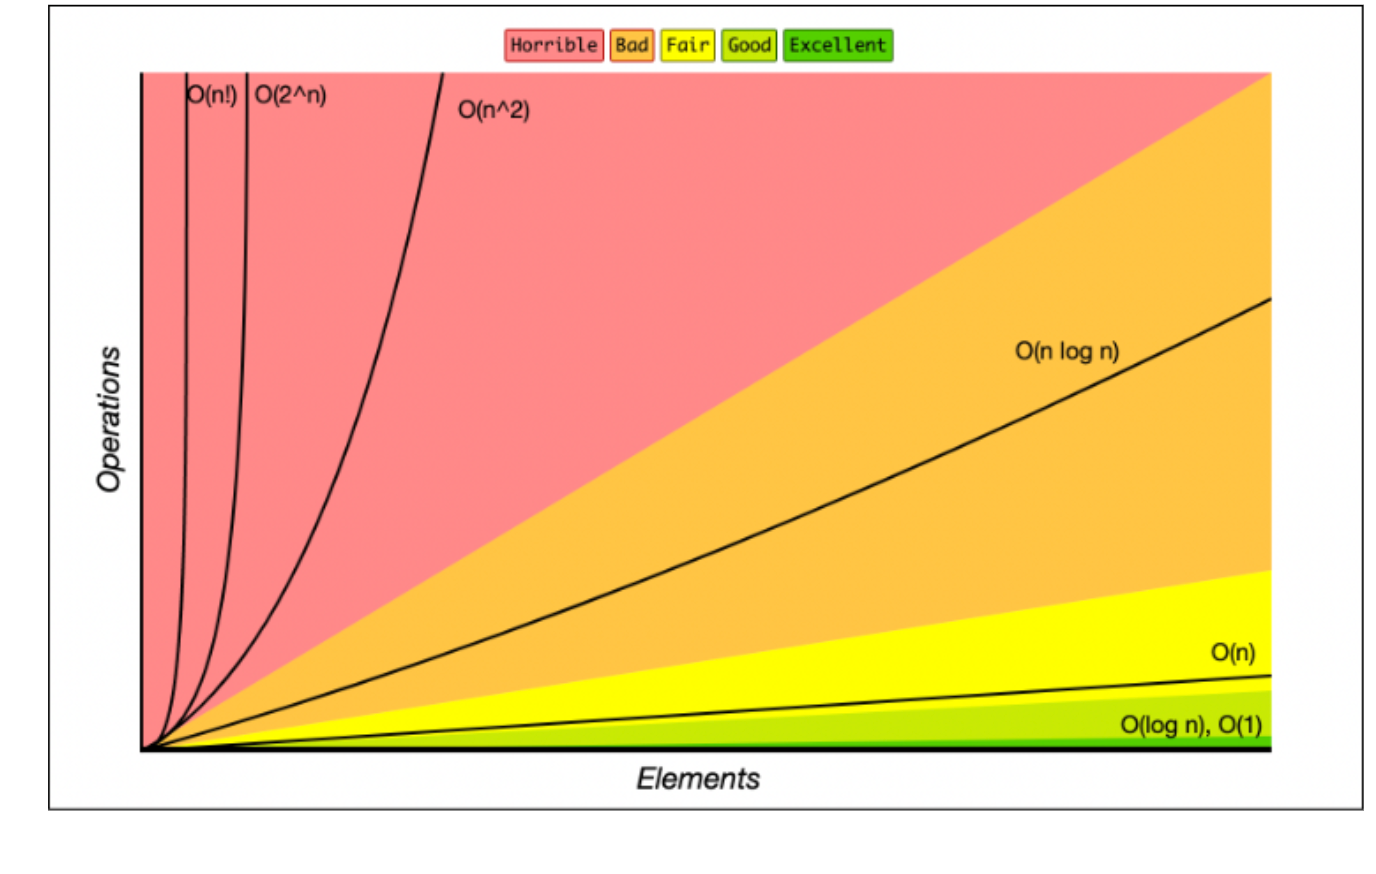

##### __Matrix Inverse and SVD Time Complexity__
source: source: [Wikipedi](https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations) \\
Note: $\psi = 2.3728596$

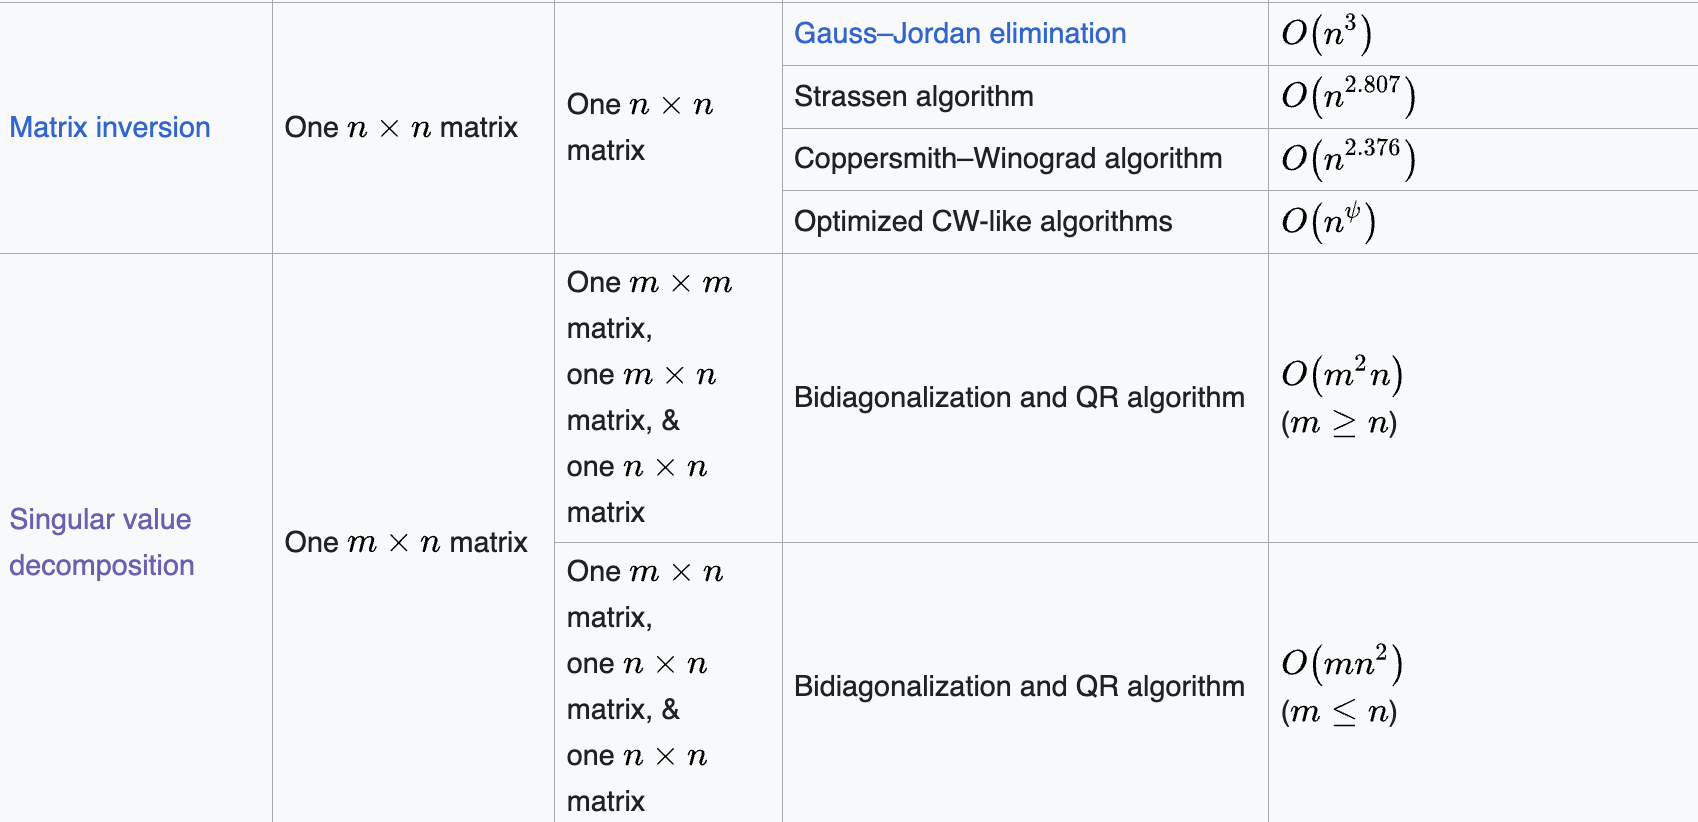

##### __Tikhonov Time Complexity__



$$O(n^2)$$

* This is being cited from a Double-difference traveltime tomography paper where the tikhonov regulation method is used in a more complicated experiment using the optimization form of the conventional Tikhonov regularization equation:

    $$ E(\hat m) = \min_m ||\tilde{G} \tilde{m} - \tilde{d} \ ||^{2}_{2} +|| W L \tilde{m} \ ||^{2} _ {2} + || \Lambda \tilde{m} \ ||^{2} _ {2} ,$$

* Where:
    - $ \hat m \ $ is a vector holding multiple models
    - $L$ is a diagonal matrix holding multiple first-order smoothing matrices
    - $W$ and $\Lambda$ are diagonol matrices holding multiple regularization
     parameters
    
* source: Eq. (5): [Double-difference traveltime tomography ...](https://earthquake.ustc.edu.cn/_upload/article/files/ce/38/078d873d4a39ad1937d47973eb8c/880a708c-0d99-4964-9c72-7f8cc1c03bd1.pdf#:~:text=Through%20an%20analysis%20of%20the%20computational%20cost%2C,synthetic%20model%20to%20validate%20the%20improvement%20associated)

---


## Functions Library

### Required Packages Imports

This section imports all necessary Python libraries and packages required to run the seismic tomography experiment. It includes numerical computing tools (numpy, scipy), data visualization libraries (matplotlib, plotly), interactive UI elements (ipywidgets), and machine learning utilities (sklearn.metrics) for model evaluation. Ensure this cell is executed before running any subsequent code cells in the notebook.



In [ ]:
# Importing Packages
from  IPython.display import display, HTML, Markdown, clear_output
from plotly.subplots import make_subplots
from sklearn.metrics import mean_squared_error
import ipywidgets as widgets
import matplotlib.ticker as plticker
import matplotlib.pyplot as plt # used
import numpy as np # used
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns # used

# output area
output = widgets.Output()

### Function Definitions

---

#### __def background( )__

Sets up a black background matplotlib figure with white axis ticks and labels for consistent plot styling.

###### Code originated from prior team's notebook:

* [Imaging Utilizing 2D Ray Travel Times](https://colab.research.google.com/drive/1Te2ljnVhwDOSbxF7gra1ZE0vbBMJfE9E#scrollTo=xr2rrs0RgLhU&line=6&uniqifier=1)

In [ ]:
def background():
  fig = plt.figure()
  fig.patch.set_facecolor('black')

  # Axis configuration
  ax = fig.add_subplot()
  ax.set_facecolor('black')
  ax.xaxis.label.set_color('white')
  ax.yaxis.label.set_color('white')
  ax.tick_params(axis='x', colors='white')
  ax.tick_params(axis='y', colors='white')
  ax.spines['left'].set_color('white')
  ax.spines['bottom'].set_color('white')

  fig = plt.gcf()
  fig.set_size_inches(10,7)

---

#### __def get_medium(x_grid, z_grid, pert=None)__

Generates the velocity (ctrue) and slowness (strue) models. Applies a circular perturbation if specified.

In [ ]:
def get_medium(x_grid, z_grid, pert=None):
    """
    Generate the medium properties, including the velocity model `ctrue` and
    the slowness model `strue`, optionally applying a perturbation.

    Parameters:
    - xgrid: 1D array of x-coordinates of the grid
    - zgrid: 1D array of z-coordinates of the grid
    - pert: (Optional) Perturbation object with attributes `x`, `z`, and `r`
            (center and radius of the perturbation)

    Returns:
    - ctrue: 2D array of velocity model
    - strue: 2D array of slowness model (inverse of velocity)
    """
    # Define grid dimensions
    nx = len(x_grid)
    nz = len(z_grid)

    # Initialize the velocity model with constant values (2000 m/s)
    ctrue = 2000.0 * np.ones((nz - 1, nx - 1))

    # Apply perturbation if provided
    if pert is not None:
        for iz in range(nz - 1):
            for ix in range(nx - 1):
                # Compute the distance from the perturbation center
                dist = np.sqrt((x_grid[ix] - pert['x'])**2 + (z_grid[iz] - pert['z'])**2)
                if dist < pert['r']:
                    ctrue[iz, ix] += 100  # Apply perturbation to velocity


    # Compute the slowness model (inverse of velocity)
    strue = np.reciprocal(ctrue).flatten()  # Inverse and flatten to 1D array

    return ctrue, strue

---

#### __def get_source_receivers_outer_edge(x_grid, z_grid, ns, nr)__

Places sources along the left boundary and receivers along the right boundary of the grid, evenly spaced or randomly sampled.

In [ ]:
def get_source_receivers_outer_edge(x_grid, z_grid, ns, nr):
    """
    Generate source and receiver positions along the outer edge of the grid.

    Parameters:
    - xgrid: 1D NumPy array of x-coordinates of the grid
    - zgrid: 1D NumPy array of z-coordinates of the grid
    - ns: Number of source points
    - nr: Number of receiver points

    Returns:
    - srcz: NumPy array of z-coordinates of the sources
    - srcx: NumPy array of x-coordinates of the sources
    - recx: NumPy array of x-coordinates of the receivers
    - recz: NumPy array of z-coordinates of the receivers
    """

    # Define source z-coordinates
    np.random.seed(123)

    if ns == 1:
        srcz = np.array([np.random.choice(z_grid)])  # Sample one point from zgrid
    else:
        srcz = np.linspace(z_grid[1], z_grid[-2], num=ns) if len(z_grid) > 2 else np.array([z_grid[0]])

    # Define source x-coordinates (fixed at the left boundary)
    srcx = np.full(ns, x_grid[0])

    # Define receiver z-coordinates
    if nr == 1:
        recz = np.array([np.random.choice(z_grid)])  # Sample one point from zgrid
    else:
        recz = np.linspace(z_grid[1], z_grid[-2], num=nr) if len(z_grid) > 2 else np.array([z_grid[0]])

    # Define receiver x-coordinates (fixed at the right boundary)
    recx = np.full(nr, x_grid[-1])

    return src_z, src_x, rec_x, rec_z

---

#### __def find_intersect(A1, A2, B1, B2, C1, C2, D1, D2, to=1e-10)__

Taken from prev. code. made it better. The find_intersect function now properly determines where a line segment intersects cell boundaries.

Purpose: Finds the intersection point between a line segment

AB (ray path) and another segment

P1P2 (grid boundary).

Breakdown:

The helper function line_eq(p1, p2) returns the coefficients (A, B, C) of a line equation in the form: Ax+By=C.
The function then calculates the determinant (det) to check if the two lines are parallel (i.e., det == 0, meaning no intersection).
If an intersection exists, the function calculates the intersection point (x,y).
Finally, it verifies if the intersection point lies within the bounds of segment P1P2 (not just on the infinite line). If it does, the function returns the point; otherwise, it returns None.

In [ ]:
def find_intersect(A1, A2, B1, B2, C1, C2, D1, D2, tol=1e-10):
    """
    Find the intersection point between two segments.

    The first segment is defined by endpoints A = (A1, A2) and B = (B1, B2),
    the second segment by endpoints C = (C1, C2) and D = (D1, D2).

    Returns:
        A tuple (x, y) for the intersection point if it exists (including endpoints),
        or None if the segments are parallel or do not intersect.
    """
    # Compute dFP equivalent to the determinant used for checking parallelism;
    # dot product of the edge of cell segment
    # with the perdendicular line to the ray path.
    # Note: that the line segments (ray path and cell edge) can be
    # represented by directional vectors as follows:
    # F = D - C (edge of a grid cell)
    # E = A - B (ray path)
    # P = (-E[1], E[0]) (perpendicualar vector to ray path E)
    # dFP = dot product of P and F
    dFP = (D1 - C1) * (A2 - B2) + (B1 - A1) * (D2 - C2)


    # Check if segments are parallel (or nearly parallel)
    if np.abs(dFP).item() < tol:
        return None

    # Compute the parameter h along segment CD where the intersection occurs.
    h = ((A1 - C1) * (A2 - B2) + (A2 - C2) * (B1 - A1)) / dFP

    # Check if h is between 0 and 1 (inclusive)
    if 0 <= h <= 1:
        # Compute and return the intersection point on segment CD.
        x_intersect = C1 + h * (D1 - C1)
        y_intersect = C2 + h * (D2 - C2)
        return (x_intersect, y_intersect)
    else:
        return None

---

#### __def find_length_in_cell(xmin, xmax, zmin, zmax, A1, A2, B1, B2)__

https://colab.research.google.com/drive/1_tKDTPsJsVC1LgdNnMViVunH1K9_Fffs?authuser=1#scrollTo=GUwPsMvvQfJq <-- user needs access, need to update this...


find_length_in_cell taken form prev. code. Went ahead and fixed their issue of the horizontal line getting counted twice. The function now ensures that horizontal edges are counted only in the lower cell and vertical edges only in the left cell. now with a better handling of edge casse: if a line is exactly on a boundary, it is counted only once instead of by two adjacent cells.

Purpose:
Determines the segment length of a ray inside a specific cell of the grid.

Breakdown:

- It finds possible intersection points between the ray AB and the four edges of the cell:
 - Left edge: P1
 - Bottom edge: P2
 - Top edge: P3
 - Right edge: P4
- Stores valid intersections in the list P, removing duplicates using np.unique(P, axis=0).
- Uses a lambda function (test) to check for double counting of edges.
- If at least two valid intersection points exist:
 - It avoids double counting cases where the ray passes along the cell boundary.
 - Computes the Euclidean distance between the two points using np.linalg.norm(P[1] - P[0]).
- If fewer than two points exist, it means the ray does not pass through the cell, so it returns 0.

In [ ]:
def find_length_in_cell(xmin, xmax, zmin, zmax, A1, A2, B1, B2):
    # Find intersections with the four sides of the cell
    P1 = find_intersect(A1, A2, B1, B2, xmin, zmin, xmin, zmax) # left
    P2 = find_intersect(A1, A2, B1, B2, xmin, zmin, xmax, zmin) # bottom
    P3 = find_intersect(A1, A2, B1, B2, xmin, zmax, xmax, zmax) # top
    P4 = find_intersect(A1, A2, B1, B2, xmax, zmin, xmax, zmax) # right

    P = [p for p in [P1, P2, P3, P4] if p is not None]
    P = np.unique(P, axis=0)  # Removal of duplicate points which helped the fix in prev. code

    test = lambda i, q: any((x == i).all() for x in q)

    if len(P) >= 2:
        # Fix: Prevent double counting of edges
        if test([xmin, zmax], P) and test([xmax, zmax], P):  # Top edge
            return 0
        elif test([xmax, zmin], P) and test([xmax, zmax], P):  # Right edge
            return 0
        else:
            return np.linalg.norm(P[1] - P[0])  # Compute segment length
    return 0

---

#### __get_forw_operator(x_grid, z_grid, src_x, src_z, rec_x, rec_z)__

Builds the forward operator matrix $G$ by computing travel distances of rays through each grid cell.

In [ ]:
def get_forw_operator(x_grid, z_grid, src_x, src_z, rec_x, rec_z):
    """
    Compute the forward operator matrix G.

    Parameters:
    x_grid (np.ndarray): 1D array of x-coordinates of the grid.
    z_grid (np.ndarray): 1D array of z-coordinates of the grid.
    src_x (np.ndarray): 1D array of x-coordinates of the sources.
    src_z (np.ndarray): 1D array of z-coordinates of the sources.
    rec_x (np.ndarray): 1D array of x-coordinates of the receivers.
    rec_z (np.ndarray): 1D array of z-coordinates of the receivers.

    Returns:
    np.ndarray: Forward operator matrix G.
    """
    nx = len(x_grid)
    nz = len(z_grid)
    num_sources = len(src_x)
    num_receivers = len(rec_x)
    num_cells = (nx - 1) * (nz - 1)  # Total number of cells
    G = np.zeros((num_sources * num_receivers, num_cells))

    for isrc in range(num_sources):
        for ir in range(num_receivers):
            for iz in range(nz - 1):
                for ix in range(nx - 1):
                    # Changed indexing to correctly map to the G matrix
                    G[ir + isrc * num_receivers, iz + ix * (nz - 1)] = find_length_in_cell(
                        x_grid[ix], x_grid[ix + 1], z_grid[iz], z_grid[iz + 1],
                        src_x[isrc], src_z[isrc], rec_x[ir], rec_z[ir]
                    )

    return G

---

#### __def get_inverse_operator(G)__

Computes a regularized inverse of the forward operator $G$ using Singular Value Decomposition (SVD).

Code was translated from [Pawan Bharadwaj Ray Tomography Pluto notebook](https://pawbz.github.io/Interactive-Seismology.jl/raytheory/ray-tomography/) written in Julia with the help of ChatGpt.

In [ ]:
def get_inverse_operator(G):
    # Compute SVD
    U, S, Vt = np.linalg.svd(G, full_matrices= False)
    # U  = orthogonal "Symmetric left or S left" (G G^t). It is an m x m matrix given G is an m x n matrix
    # S  = Σ (diagonal matrix of eigenvalues [along diagonals] where eigens > 0). It is an m x n (same as G)
    # Vt = orthogonal "Symmetric right or S right" (G^t G). It is an n x n matrix given G is an m x n matrix

    # Regularize and compute inverse of singular values
    S_inv = 1 / (S + 1e-1)

    # Compute regularized inverse using SVD components
    Gi = Vt.T @ np.diag(S_inv) @ U.T

    return Gi, S

---

#### __def plot_models( )__

Displays a side-by-side heatmap comparison between the true velocity model and the reconstructed model.

Code was translated from [Pawan Bharadwaj Ray Tomography Pluto notebook](https://pawbz.github.io/Interactive-Seismology.jl/raytheory/ray-tomography/) written in Julia with the help of ChatGpt.


In [ ]:
def plot_models(c_dict, width=1000):
    """
    Plot True Seismic Velocity, Estimated Seismic Velocity, and Backpropagated Data Residuals
    side by side with a fixed width.
    """
    fig_height = int(width / 3)
    fig, axs = plt.subplots(1, 3, figsize=(width/100, fig_height/100))  # inches

    # Data and titles
    titles = ['True Seismic Velocity', 'Estimated Seismic Velocity', 'Backpropagated Data Residuals']
    data = [c_true.T, c_dict['Estimated Seismic Velocity'], c_dict['Backpropagated Data Residuals']]

    for ax, title, z in zip(axs, titles, data):
        im = ax.imshow(z, aspect='auto', origin='lower', cmap='cividis')
        ax.set_title(title)
        fig.colorbar(im, ax=ax, shrink=0.7)

    plt.tight_layout()
    return fig

---

#### __def plot_ray_setup(num_sources, num_receivers)__

Visualizes ray paths between each source and receiver over a black background.

In [ ]:
def plot_ray_setup(num_sources, num_receivers):
  background() # calls background()
  plt.title('Ray Paths', color='white') # Title
  plt.xlabel('X')
  plt.ylabel('Z')
  p1 = [plt.plot([src_x[isrc], rec_x[irec]], [src_z[isrc], rec_z[irec]]) for isrc in range(num_sources) for irec in range(num_receivers)]
# use a nested list comprehension to plot lines between each source and every receiver

  plt.title(f"Ray Geomerty ({num_sources} sources and {num_receivers} receivers)", color='white')
  plt.show() # display the plot

---

#### __def plot_ray_setup_with_data_residuals()__

Displays ray paths with color-coded data residuals using Plotly. Highlights high-error rays in red.

In [ ]:
def plot_ray_setup_with_data_residuals():

    ray_setup = ray_scatter_plot_with_data_residuals()

    fig = go.Figure(ray_setup)
    fig.update_layout(
        title={
            'text': "Ray Geometry With Data Residuals<br>(red ray paths have higher data residuals)",
               'x': 0.5,
            'xanchor': 'center'
        },
        width=1000,
        height=700,
        showlegend=False,
        font=dict(size=12, color='blue'),
        plot_bgcolor= 'white',
        xaxis=dict(
            title="x", ticks="outside", tickwidth=1, tickcolor="black",
            ticklen=10, gridcolor="gray", zeroline=False
        ),
        yaxis=dict(
            title="z", scaleanchor="x", ticks="outside", tickwidth=1,
            tickcolor="black", ticklen=10, gridcolor="gray", zeroline=False,
            autorange="reversed"  # Ensures depth is plotted correctly
        ),
        xaxis_tickvals=x_grid_inv,
        yaxis_tickvals=z_grid_inv
    )
    fig.show()

---

#### __def ray_scatter_plot_with_data_residuals( )__

Generates Plotly Scatter objects for ray paths, colored by normalized data residuals, for use in plot_ray_setup_with_data_residuals().


In [ ]:
def ray_scatter_plot_with_data_residuals():
    # data_residual, num_sources, num_receivers, srcx, srcz, recx, recz are global variables

    # Normalize data_residual for color mapping
    data_residual_norm = (data_residual - np.min(data_residual)) / np.ptp(data_residual)  # Correct normalization

    # Get colors using the Cividis colormap from Matplotlib
    cmap = plt.get_cmap("seismic")
    data_residual_colors = [cmap(val) for val in data_residual_norm.flatten()]  # Generate RGBA tuples

    # Initialize list to store ray scatter plots
    ray_setup = []

    # Loop through sources (is) and receivers (ir)
    for ir, is_ in np.ndindex(num_receivers, num_sources):  # Ensure correct loop order

        # Compute color index
        color_index = ir + is_ * num_receivers

        # Convert color from (R, G, B, A) -> "rgba(R, G, B, A)"
        rgba_color = data_residual_colors[color_index]
        rgba_string = f"rgba({int(rgba_color[0]*255)}, {int(rgba_color[1]*255)}, {int(rgba_color[2]*255)}, {rgba_color[3]})"

        # Create scatter plot for the ray path
        scatter = go.Scatter(
            x=[srcx[is_], recx[ir]],
            y=[srcz[is_], recz[ir]],
            mode="lines+markers",
            marker=dict(
                symbol="asterisk",
                size=10,
                color=rgba_string,  # Corrected color format
                line=dict(color="black")
            ),
            opacity=0.15
        )

        # Append to list
        ray_setup.append(scatter)

    return ray_setup

# Results & Discussion
---

## Seismic Tomography Experiment

### __Step 1: Experiment Setup__

By default, the notebook is initialized with a stock setting. If any of the input parameters are changed using the sliders, the user must re-run all code from the code cell immediately following the sliders to the end of the notebook.

* Provide the following inputs for the experiment using sliders:
    * number of sources.
    * number of receivers.
    * grid step step size ds for the true model.
    * step size ds_inv for the estimated model.
    * perturbation parameters.
* Define grid ($x_{grid}, z_{grid}$) for the true model.
* Define grid ($x_{grid/inv}, z_{grid/inv}$) for the estimated model.
* Position the sources and receivers on the edge of the grid ($x_{grid}, z_{grid}$) used for the true model.
* Plot the source-reciever geometry set up.

For Steps 1-6, the following applies:
* code was translated from [Pawan Bharadwaj Ray Tomography Pluto notebook](https://pawbz.github.io/Interactive-Seismology.jl/raytheory/ray-tomography/) written in Julia with the help of ChatGpt.

#### 1a. Global Variables set by users via UI sliders

In [ ]:
# Global variables that can be changed for experimentation

# Initialized to respective slider's default values unless user submit new values via sliders
num_sources = None
num_receivers = None
ds = None
ds_inv = None
perturbation = {
        'x': None,
        'z': None,
        'r': None
        } # Initialized perturbation values; Value will be updated v

In [ ]:
# Slider widgets: Get number of source(s) and receiver(s) from user
# prompt the user to provide number of recievers and sources
sources_slider = widgets.IntSlider(
    value=10, # default value
    min=1,
    max=300,
    step=1,
    description= 'Sources: ',
    continuous_update=False
)

receivers_slider = widgets.IntSlider(
    value=50, # default value
    min=1,
    max=300,
    step=1,
    description= 'Receivers: ',
    continuous_update=False
)

# Update global variables with slider defaults
num_sources = sources_slider.value
num_receivers = receivers_slider.value

srcs_rcvrs_submit_button = widgets.Button(
    description="Submit Srcs & Rcvrs",
    button_style='info'
)

In [ ]:
# Function handling the submission of number of sources and receivers
def on_srcs_rcvrs_bttn_clicked(b):
    # Get current values from sliders and dropdown directly
    global num_sources, num_receivers # makes variables' value available outside this function
    num_sources = sources_slider.value # number of sources (rows)
    num_receivers = receivers_slider.value # number of receivers (columns)

    with output:
        srcs_rcvrs_submit_button.disabled = True
        srcs_rcvrs_submit_button.button_style = 'success'
        srcs_rcvrs_submit_button.description = 'Submitted!'

srcs_rcvrs_submit_button.on_click(on_srcs_rcvrs_bttn_clicked)

In [ ]:
# Resolution input for the true and inverted media
resolution_true_slider = widgets.IntSlider(
    value=100, # Default value
    min = 10,
    max = 800,
    step = 1,
    description ='ds',
    continuous_update = False
)

resolution_inv_slider = widgets.IntSlider(
    value=250, # Default value
    min = 10,
    max = 800,
    step = 1,
    description ='ds_inv',
    continuous_update = False
)

# Update global variables with slider defaults
ds = resolution_true_slider.value
ds_inv = resolution_inv_slider.value

ds_ds_inv_submit_button = widgets.Button(
    description="Submit ds & ds_inv",
    button_style='info'
)

In [ ]:
# Function handling the submission of ds and ds_inv resolution
def on_ds_ds_inv_bttn_clicked(b):

    # Get current values from sliders and dropdown directly
    global ds, ds_inv # makes variables' value available outside this function
    ds = resolution_true_slider.value # resolution for true model
    ds_inv = resolution_inv_slider.value # resolution for inverse/estimated model

    with output:
        ds_ds_inv_submit_button.disabled = True
        ds_ds_inv_submit_button.button_style = 'success'
        ds_ds_inv_submit_button.description = 'Submitted!'

ds_ds_inv_submit_button.on_click(on_ds_ds_inv_bttn_clicked)

In [ ]:
# Input for Medium Parameters
circular_pert_x_slider = widgets.FloatSlider(
    value = 0, # default value
    min = -1000,
    max = 1000,
    step = 1,
    description= 'x: ',
    continuous_update=False
)

circular_pert_z_slider = widgets.FloatSlider(
    value = 0, # default value
    min = -1000,
    max = 1000,
    step = 1,
    description= 'z: ',
    continuous_update=False
)

pert_radius_slider = widgets.FloatSlider(
    value = 100, # default value
    min = 10,
    max = 500,
    step = 1,
    description= 'r: ',
    continuous_update=False
)

# Update global variables with slider defaults
perturbation['x'] = circular_pert_x_slider.value
perturbation['z']= circular_pert_z_slider.value
perturbation['r'] = pert_radius_slider.value

pert_submit_button = widgets.Button(
    description="Submit perturbation",
    button_style='info'
)

In [ ]:
# Function handling the submission of pertubation
def on_pert_bttn_clicked(b):

    # Get current values from sliders and dropdown directly
    global perturbation # makes variables' value available outside this function

    perturbation['x'] = circular_pert_x_slider.value # center point x
    perturbation['z']= circular_pert_z_slider.value # center point z
    perturbation['r'] = pert_radius_slider.value # radius

    with output:
        pert_submit_button.disabled = True
        pert_submit_button.button_style = 'success'
        pert_submit_button.description = 'Submitted!'

pert_submit_button.on_click(on_pert_bttn_clicked)

In [ ]:
# creates a reset button
reset_button = widgets.Button(
    description='Reset',
    button_style = 'warning'
)

In [ ]:
# Function to reset all widgets
def reset_widgets(b):
    global num_sources, num_receivers, perturbation, ds, ds_inv # makes variables' value available outside this function

    # Reset to default values
    num_sources = sources_slider.value = 13
    num_receivers= receivers_slider.value = 21

    perturbation['x'] = circular_pert_x_slider.value = 0
    perturbation['z']= circular_pert_z_slider.value = 0
    perturbation['r'] = pert_radius_slider.value = 100

    ds = resolution_true_slider.value = 144
    ds_inv = resolution_inv_slider.value = 233

    # Reset button style and text
    srcs_rcvrs_submit_button.disabled = False
    srcs_rcvrs_submit_button.button_style = "info"
    srcs_rcvrs_submit_button.description = "Submit Srcs & Rcvrs"

    pert_submit_button.disabled = False
    pert_submit_button.button_style = "info"
    pert_submit_button.description = "Submit Perturbation"

    ds_ds_inv_submit_button.disabled = False
    ds_ds_inv_submit_button.button_style = "info"
    ds_ds_inv_submit_button.description = "Submit ds & ds_inv"


    with output:
        clear_output(wait=True)  # Clear output when resetting

# Attach function to reset button
reset_button.on_click(reset_widgets)

#### 1b. Inputs Prompts and Submission Buttons

This section provides interactive slider widgets and submission buttons to define the experimental parameters for seismic tomography. Users can specify the number of sources and receivers, grid resolutions for the true and estimated models (`ds` and `ds_inv`), and perturbation characteristics (center coordinates and radius). A reset button is also provided to restore all inputs to default values before running the simulation pipeline.

By default, the notebook is initialized with a stock setting. If any of the input parameters are changed using the sliders, the user must re-run all code from the code cell immediately following the sliders *to the end of the notebook*. It is recommended that the user clicks into the next code cell and then uses **Runtime → Run cell and below** to ensure all updates are correctly applied throughout the simulation workflow.

In [ ]:
# Prompt user for Inputs

# Source-Receiver Inputs
display(Markdown("### How many recievers and sources?"))
display(sources_slider, receivers_slider, srcs_rcvrs_submit_button)

# True and Inverted media resolution inputs (ds and ds_inv)
display(Markdown("### Resolution for the true and inverted media"))
display(resolution_true_slider, resolution_inv_slider, ds_ds_inv_submit_button )

# Circular Pertubation Inputs
display(Markdown("### Medium Circular Pertubation center point and radius"))
display(circular_pert_x_slider, circular_pert_z_slider, pert_radius_slider,pert_submit_button )

# Reset Button
display(Markdown("### Reset inputs"))
display(reset_button)

### How many recievers and sources?

IntSlider(value=10, continuous_update=False, description='Sources: ', max=300, min=1)

IntSlider(value=50, continuous_update=False, description='Receivers: ', max=300, min=1)

Button(button_style='info', description='Submit Srcs & Rcvrs', style=ButtonStyle())

### Resolution for the true and inverted media

IntSlider(value=100, continuous_update=False, description='ds', max=800, min=10)

IntSlider(value=250, continuous_update=False, description='ds_inv', max=800, min=10)

Button(button_style='info', description='Submit ds & ds_inv', style=ButtonStyle())

### Medium Circular Pertubation center point and radius

FloatSlider(value=0.0, continuous_update=False, description='x: ', max=1000.0, min=-1000.0, step=1.0)

FloatSlider(value=0.0, continuous_update=False, description='z: ', max=1000.0, min=-1000.0, step=1.0)

FloatSlider(value=100.0, continuous_update=False, description='r: ', max=500.0, min=10.0, step=1.0)

Button(button_style='info', description='Submit perturbation', style=ButtonStyle())

### Reset inputs

Button(button_style='warning', description='Reset', style=ButtonStyle())

#### 1c. Grid and Source-Receiver Set up

In [ ]:
# If above parameters are changed, click inside this cell, go to "Runtime",
# select "Run Cell and Below", to update all of the products below.

##### Grid Set up using User Inputs

In [ ]:
# Creating grid x and z axis as global variables using the global input variables: num_sources, num_receivers, ds, and ds_inv

# Grid Constants
XMIN = -1000
XMAX = 1000
ZMIN = -1000
ZMAX = 1000
GRID_LEN = XMAX - XMIN

# Define grids for true modeling
x_grid = np.linspace(XMIN, XMAX, num=int(GRID_LEN/ds))  # x grid points
z_grid = np.linspace(ZMIN, ZMAX, num=int(GRID_LEN/ds))  # z grid points

# Define grids for estimated model
x_grid_inv = np.linspace(XMIN, XMAX, num=int(GRID_LEN/ds_inv))  # x_inverse grid points
z_grid_inv = np.linspace(ZMIN, ZMAX, num=int(GRID_LEN/ds_inv))  # z_inverse grid points

nx = len(x_grid) # number of points in x
nz = len(z_grid) # number of points in z

##### Source-Receiver set up

In [ ]:
# Set the Source-receiver positions using the global variables for the two grid axex
src_z = np.linspace(z_grid[0], z_grid[-1], num_sources) # positions of the sorces on the leftmost x-grid point
src_x = np.full_like(src_z, x_grid[0]) # evenly spaced along the z-axis

rec_z = np.linspace(z_grid[0] + (ds / 2), z_grid[-1] - (ds / 2), num_receivers) # position of recivered on the rightmost x-grid point
rec_x = np.full_like(rec_z, x_grid[-1]) # evenly spaced along the z-axis

#### 1d. Ray Path Geometry Plot

This plot displays the ray paths between each source and receiver across the model domain, illustrating the spatial coverage, angular distribution, and overall geometry of the ray network. It helps assess whether the forward model sufficiently samples the subsurface for reliable inversion.

[plot ray setup function](#scrollTo=0oX0TmPTpxIy&line=1&uniqifier=1)

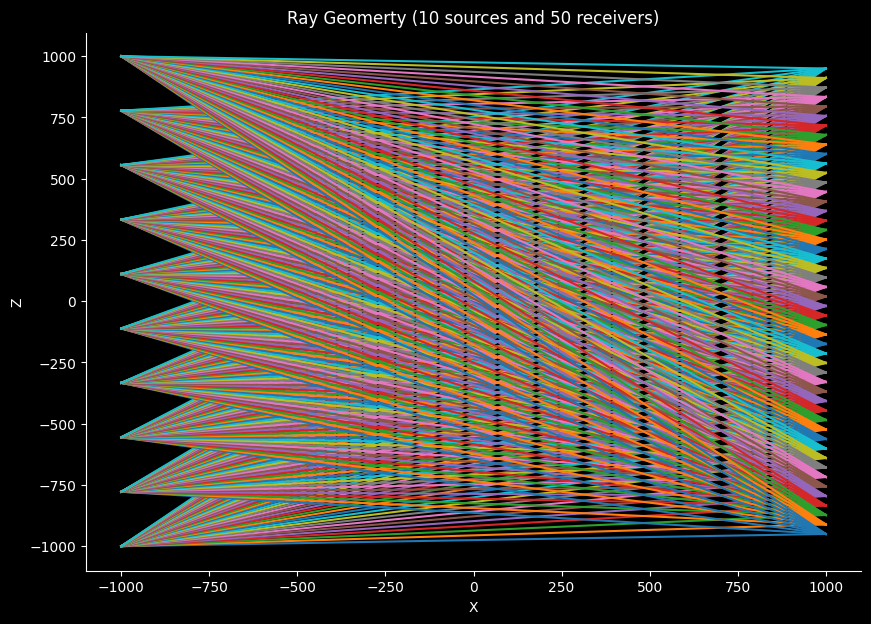

In [ ]:
plot_ray_setup(num_sources, num_receivers)

### __Step 2. Solve for the observed data ($d_{obs}$) using the forward problem.__

Our observed data is generated by using the forward problem which is represented by the equation below to solve for $d_{obs} \\ $.

$$d_{obs} = G \ \times  \ s \ $$

 Where,

 * $s$ is a slowness model, an $n \times  1$ vector with $n$ being the total number of grid cells in the model grid also call pixels for 2-D models. n is given by $(n_x - 1) * (n_z -1)$ with $n_x$ and $n_z$ being the total number of grid cells along the $x$ and $z$ axis, respectively. The model is either known or given.

* $G$ is the forward operator that is constructed to take into account the model grid and the source-receiver setup. It is an $m \times  n$ matrix with $m$ rows of ray paths and n columns of cell grids. The forward operator is also known or given.

* $ \\ d_{obs} $ is the observed data which are the ray paths' travel times. It is the variable to be solved for in the forward problem and is the synthetic data that will be used in the inverse problem to solve for the estimated model and estimated slowness of the model.

* [get source receivers outer edge function](#scrollTo=6arCBzmohhlg&line=12&uniqifier=1)
* [get forward operator function](#scrollTo=1_AbfEdugf24&line=5&uniqifier=1)
* [get medium function](#scrollTo=ndcJcAr4jyMp&line=4&uniqifier=1)


In [ ]:
# Forward Problem

# Get the source and receiver coordinates
srcz, srcx, recx, recz =  get_source_receivers_outer_edge(x_grid, z_grid, num_sources, num_receivers)

# Compute the forward operator matrix
G_true = get_forw_operator(x_grid, z_grid, srcx, srcz, recx, recz)

# Get the medium properties
c_true, s_true = get_medium(x_grid, z_grid, perturbation) # c_true == synthetic model anomaly.  s_true == speed (inverse of the velocity {1/v}).

# Compute observed data (dobs)
data_observed = G_true @ s_true  # Matrix-vector multiplication

### __Step 3. Solve for the estimated model and estimated slowness using the Inverse Problem.__



[get_inverse_operator function](#scrollTo=wt9ab2JBApbN&line=7&uniqifier=1)


In [ ]:
# Inverse Problem
G = get_forw_operator(x_grid_inv, z_grid_inv, srcx, srcz, recx, recz)

In [ ]:
# Computing G_inverse: 2 methods

# Regularized Inverse using SVD components (Tikhonov) and Moor-Penrose pseudoinverse
G_inverse, S = get_inverse_operator(G)

# Computing Slowness Estimate
slowness_estimate = G_inverse @ data_observed # inverse map
c_est = (1/slowness_estimate).reshape(len(z_grid_inv)-1, len(x_grid_inv)-1) # model estimate

### __Step 4. Plot G's Singular values and Calculate Uncertainty__

This scree plot shows the singular values of the forward operator $G$, providing insight into the rank and conditioning of the matrix, which impacts the stability of the inverse problem.

The range of $G$'s singular values will be important when considering the range of Tikhonov parameterization values, $\lambda_n$, for when we create the L-curve plot to determine the optimal Tikhonov parameter.
* According to [Aster et al. Chapter Four - Tikhonov Regularization](https://www-sciencedirect-com.aurarialibrary.idm.oclc.org/science/article/pii/B9780128046517000092?via%3Dihub) it should be enough to use a range with $\lambda_{max} > \sigma_{max} > \sigma_{min} > \lambda_{min}$. Where $\ \sigma_{max}$ and $\ \sigma_{min}$ are $G$'s largest and smallest singular values.

In [ ]:
# Find indices of max and min
max_idx = np.argmax(S)
min_idx = np.argmin(S)

# Create base figure
fig = go.Figure(data=go.Scatter(y=S, mode='lines+markers', name='Singular Values'))

# Add max point
fig.add_trace(go.Scatter(
    x=[max_idx],
    y=[S[max_idx]],
    mode='markers+text',
    marker=dict(color='red', size=10, symbol='circle'),
    text=[f"Max: {S[max_idx]:.2e}"],
    textposition="top center",
    name='Max Value'
))

# Add min point
fig.add_trace(go.Scatter(
    x=[min_idx],
    y=[S[min_idx]],
    mode='markers+text',
    marker=dict(color='blue', size=10, symbol='x'),
    text=[f"Min: {S[min_idx]:.2e}"],
    textposition="bottom center",
    name='Min Value'
))

# Layout
fig.update_layout(
    title=f'Singular Values of G, G_true Shape: {G_true.shape}, G Shape: {G.shape}',
    xaxis_title="Index",
    yaxis_title='Value',
    legend=dict(
        x=1.02,
        y=1,
        xanchor='left',
        yanchor='top'
    )
)

fig.show()

### __Step 5. Calculate Travel Time Analytic Vs Travel Time using the forward operator G__

This step validates the correctness of the ray tracing implementation by comparing travel times computed analytically in a homogeneous medium with those computed using the forward operator $G$. Both approaches assume a constant seismic velocity of 2000 m/s. A close match between the two sets of travel times confirms that the ray path geometry and length calculations in $G$ are accurate. Discrepancies are quantified using the Root Mean Square Error (RMSE) and Relative RMSE (RRMSE).

#### 5a. Calculating travel times in homogeneous medium to confirm ray tracing is done correctly.

In [ ]:
# computing travel times in a homogeneous medium analytically
# confirming that raytracting is done properly

# not using a forward operator G for the calculation
travel_time_analytic = np.array([
    np.sqrt((srcx[isrc]- recx[irec])**2 + (srcz[isrc] - recz[irec])**2) * (1/2000)
    for isrc in range(len(srcx))
        for irec in range(len(recx))
]).reshape(-1,1).flatten()

# Using forward operator for the inverse problem labeled G for calculating travel time
travel_time_G = G @ (1/np.full(((len(z_grid_inv)-1)*(len(x_grid_inv)-1), 1), 2000)).flatten()

# calculating the relative root mean square error (rmse), mean_squared_error() is from sklearn.metrics package
travel_time_analytic_avg = np.mean(travel_time_analytic)
rmse_tta_ttg = np.sqrt(mean_squared_error(travel_time_analytic, travel_time_G))

# relative root mean square error(rrmse)
rrmse_tta_ttg = rmse_tta_ttg / travel_time_analytic_avg

#### 5b. Scatter Plot of travel_time_analytic and travel_time_G in homogeneous medium

Scatter plot comparing travel times computed analytically in a homogeneous medium (2000 m/s) against those obtained using the forward operator $G$. The Root Mean Square Error (RMSE) quantifies the modeling accuracy.

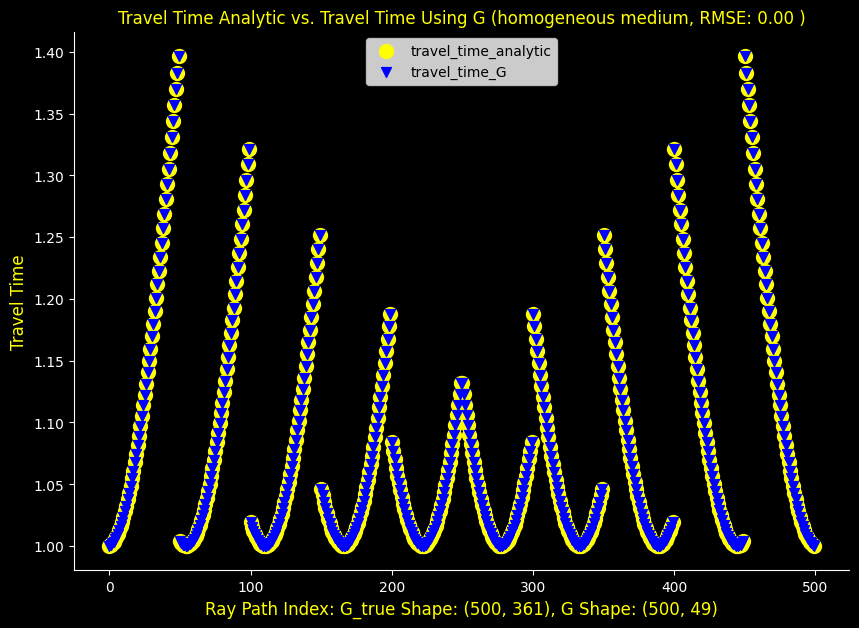

In [ ]:
# Travel Time Analytic vs Travel Time using G in a homogeneous medium
background()
plt.scatter(range(len(travel_time_analytic)),travel_time_analytic, marker='o', color ='yellow', s=100, label='Observed Travel Time')
plt.scatter(range(len(travel_time_G)),travel_time_G,marker= 'v', color ='blue', s=50, label='Predicted Travel Time')

plt.legend(["travel_time_analytic", "travel_time_G"])
plt.xlabel(f'Ray Path Index: G_true Shape: {G_true.shape}, G Shape: {G.shape}', color='yellow', fontsize=12)
plt.ylabel('Travel Time', color='yellow', fontsize=12)
plt.title(f'Travel Time Analytic vs. Travel Time Using G (homogeneous medium, RMSE: {rrmse_tta_ttg:.2f} )', color='yellow')

plt.show()

#### 5c. Scatter plot of observed travel time vs. predicted travel time (calculated using G) in non-homogeneous medium

Scatter plot comparing observed travel times (from the true model) against predicted travel times (from the estimated model using $G$). The Relative Root Mean Square Error (RRMSE) quantifies the inversion accuracy.

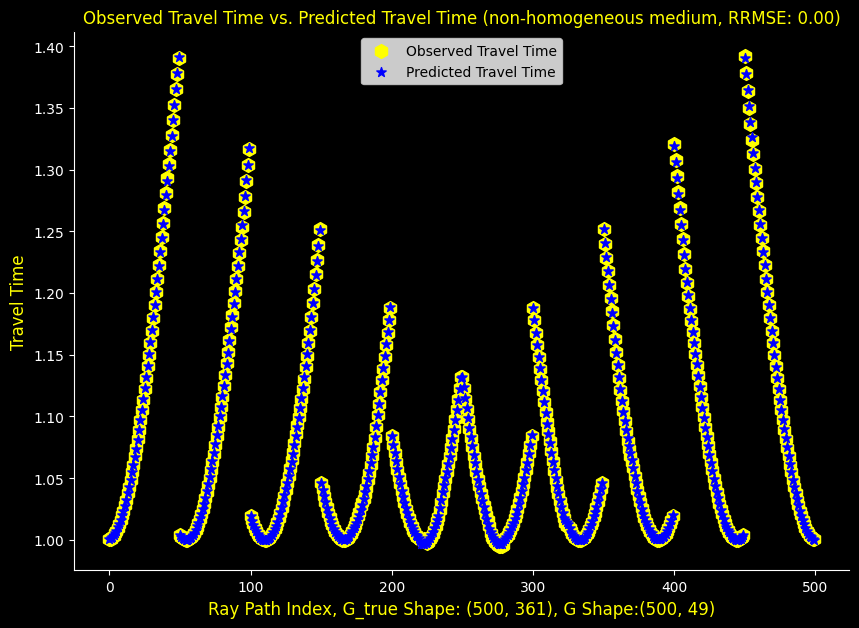

In [ ]:
# Scatter plot of observed travel time vs. predicted travel time (calculated using G) in non-homogeneous medium
# Observed Travel Time (synthetic data) was calculated using the forward operatour labeled G_true

# calculating predicted travel time
predicted_travel_time = (G @ slowness_estimate).flatten()

# calculating the relative root mean square error (rmse), mean_squared_error() is from sklearn.metrics package
data_observed_avg = np.mean(data_observed)
rrmse_value_d_obs_pred_tt = np.sqrt(mean_squared_error(data_observed, predicted_travel_time))

# relative root mean square error(rrmse)
rrmse_data_pred = rrmse_value_d_obs_pred_tt / data_observed_avg

background()
plt.scatter(range(len(data_observed)), data_observed,marker='h', color ='yellow', s= 100, label='Observed Travel Time')
plt.scatter(range(len(predicted_travel_time)), predicted_travel_time,marker= '*', color ='blue', s=50, label='Predicted Travel Time')

plt.legend(['Observed Travel Time', 'Predicted Travel Time'])
plt.xlabel(f'Ray Path Index, G_true Shape: {G_true.shape}, G Shape:{G.shape}', color='yellow', fontsize=12)
plt.ylabel('Travel Time', color='yellow', fontsize=12)
plt.title(f'Observed Travel Time vs. Predicted Travel Time (non-homogeneous medium, RRMSE: {rrmse_data_pred :.2f})', color='yellow')

plt.show()

### **Step 6: Backpropagation**

Backpropagation in this context involves computing the gradient of the misfit functional with respect to the slowness model using linear algebraic operations derived from the forward problem. Specifically, after solving the forward model to obtain predicted travel times, the residual vector

$$
\mathbf{r} = \mathbf{G} \mathbf{s}_{\text{est}} - \mathbf{d}_{\text{obs}}
$$

is formed. This residual is then backpropagated by computing the adjoint operation:

$$
\nabla \mathbf{J} = \mathbf{G}^\top \mathbf{r}
$$

where $ \mathbf{G}^\top $ is the transpose of the forward operator $ \mathbf{G} $, and $ \nabla \mathbf{J} $ is the gradient of the objective function $ \mathbf{J} $, typically representing data misfit.

This gradient encodes sensitivity information that reveals how each model cell influences the residuals, and it forms the foundation for iterative model updates in optimization-based inversion schemes. In our case, we visualize $ \nabla \mathbf{J} $ directly as a map, showing the first-order correction direction inferred from the current model–data mismatch.

#### 6a. Heat Map of True vs. Estimated Seismic Velocity & Backpropagation

1. **Estimated Seismic Velocity** – The reconstructed velocity field derived by solving the inverse problem. It represents the model’s best estimate of subsurface properties based on travel-time data and the forward operator \( G \).

2. **Backpropagated Data Residuals** – A gradient field formed by backpropagating the difference between observed and predicted travel times. This plot highlights regions where the model mismatch is greatest, offering insight into where updates may be needed in iterative inversion methods.

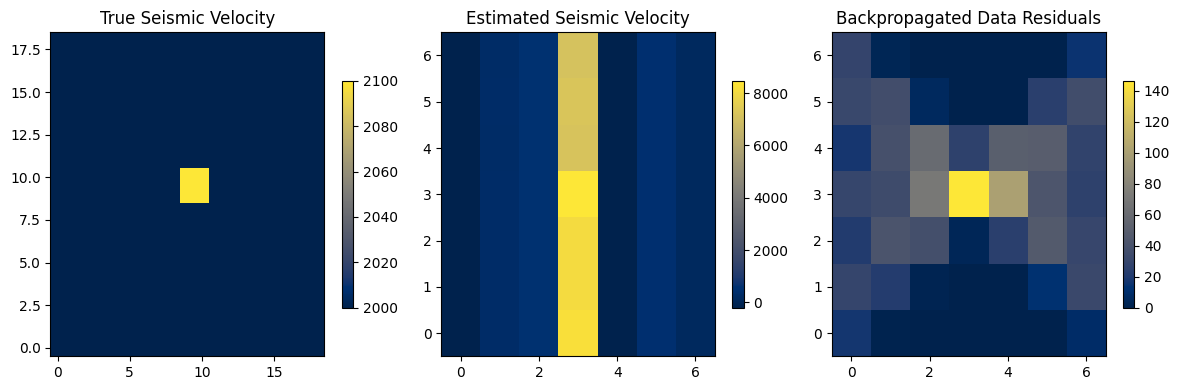

In [ ]:
# Forming the gradient using the backpropagation of traveltime residuals
data_residual = travel_time_G - data_observed
grad_slowness = (G.T @ data_residual).reshape(len(z_grid_inv)- 1, len(x_grid_inv) - 1)

# Dictionary holding c_est and slowness gradient to be used in creating heat map
c = {
    "Backpropagated Data Residuals": grad_slowness.T, # Transposed to get correct sourc-receiver set up on vertical edges of model grid.
    "Estimated Seismic Velocity": c_est.T }

# Function handling the submission of plot models input
def on_plot_models_bttn_clicked(_):
    clear_output(wait=True)
    fig = plot_models(c, width=1000)
    fig.show()

# Display model plots
fig = plot_models(c, 1200)

#### 6b. Tikhonov Regularization and the L-Curve Method

We refine our seismic velocity estimation using Tikhonov regularization, which helps stabilize the inverse problem by balancing data fidelity and model smoothness.

Specifically, we solve the regularized system:

$$
(G^\top G + \lambda^2 I)\, \mathbf{s}_{\text{est}} = G^\top \mathbf{d} + \lambda^2 \mathbf{s}_0
$$

- $ \lambda $ is the regularization parameter that controls the trade-off between fitting the observed data and smoothing the model.
- $ \mathbf{s}_0 $ is a prior model, often a smooth or uniform slowness field.
- The L-curve method is used to select an optimal $ \lambda_{\text{opt}} $ by plotting the model norm vs. the residual norm and identifying the "corner" of the curve — the best compromise between overfitting and oversmoothing.

In [ ]:
# --- Prior Model (c₀) ---
slowness_0 = np.full(G.shape[1], 1 / 2000.)

# --- L-curve Computation ---
lambda_min = np.log10(np.min(S) * 0.75)
lambda_max = np.log10(np.max(S) * 1.25)
lambdas = np.logspace(lambda_min, lambda_max, 1000)

residuals, residual_norm, slowness_est_lambda_solution_norm, slowness_est_lambda_solutions = [], [], [],[]

GtG = G.T @ G
Gt_d = G.T @ data_observed

idx = 0
for lambda_ in lambdas:
    # Tikhonov matrix: (GᵗG + λ²I)
    A = GtG + lambda_**2 * np.eye(G.shape[1])

    # RHS: Gᵗd + λ²c₀
    b = Gt_d + lambda_**2 * slowness_0

    # Solve for slowness estimate (regularized solution)
    # Use linalg.lstsq instead of linalg.solve to handle singular matrices
    slowness_est_lambda = np.linalg.lstsq(A, b, rcond=None)[0]


    # Store residuals and norms for L-curve
    residual =(G @ slowness_est_lambda - data_observed)
    residuals.append(residual)
    residual_norm.append(np.linalg.norm(residual))  # ‖Gs - d_observed‖
    slowness_est_lambda_solution_norm.append(np.linalg.norm(slowness_est_lambda - slowness_0)) # ‖s_est - s₀‖
    slowness_est_lambda_solutions.append(slowness_est_lambda)

residual_norm = np.array(residual_norm)
slowness_est_lambda_solution_norm = np.array(slowness_est_lambda_solution_norm)
slowness_est_lambda_solutions = np.array(slowness_est_lambda_solutions)

In [ ]:
# --- Parameterized L-curve for Curvature ---
log_res = np.log10(residual_norm)
log_sol = np.log10(slowness_est_lambda_solution_norm)
log_lambdas = np.log10(lambdas)

dx = np.gradient(log_res, log_lambdas)
dy = np.gradient(log_sol, log_lambdas)
d2x = np.gradient(dx, log_lambdas)
d2y = np.gradient(dy, log_lambdas)

curvature = 2 * np.abs(dx * d2y - dy * d2x) / (dx**2 + dy**2)**1.5
corner_idx = np.argmax(curvature)
corner_lambda = lambdas[corner_idx]

p1 = np.array([log_res[0], log_sol[0]])
p2 = np.array([log_res[-1], log_sol[-1]])
p1_to_all = np.vstack((log_res - p1[0], log_sol - p1[1])).T
line_vec = p2 - p1
line_unit = line_vec / np.linalg.norm(line_vec)
projections = np.dot(p1_to_all, line_unit)
proj_points = np.outer(projections, line_unit) + p1
distances = np.linalg.norm(p1_to_all - proj_points + p1, axis=1)
corner_idx_triangle = np.argmax(distances)

# --- Extract Optimal Models ---
lambda_triangle = lambdas[corner_idx_triangle]
lambda_curv = lambdas[corner_idx]
slowness_triangle = slowness_est_lambda_solutions[corner_idx_triangle]
slowness_curv = slowness_est_lambda_solutions[corner_idx].reshape(len(z_grid_inv)-1, len(x_grid_inv)-1)

# c_est
c_est_triangle = (1/slowness_triangle).reshape(len(z_grid_inv)-1, len(x_grid_inv)-1)
c_est_curve = 1/slowness_curv.reshape(len(z_grid_inv)-1, len(x_grid_inv)-1)

<ipython-input-37-293a575ca313>:11: RuntimeWarning:

invalid value encountered in divide



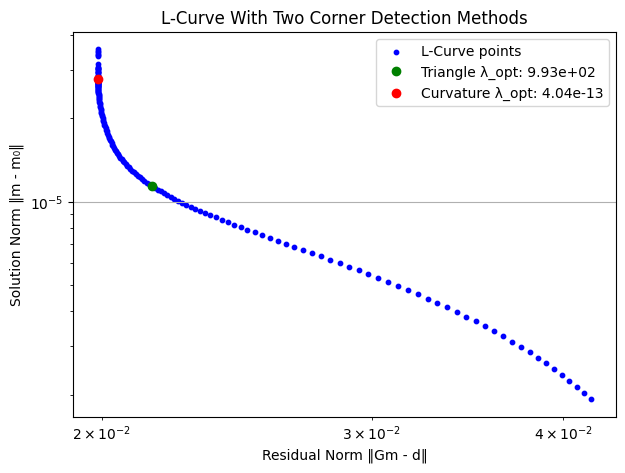

Triangle Method λ_opt: 9.93e+02
Curvature Method λ_opt: 4.04e-13


In [ ]:
# --- Plot L-curve with both corners marked ---
# Create base figure
fig, ax = plt.subplots(figsize=(7, 5))

# Use scatter instead of loglog to remove connecting lines
ax.scatter(residual_norm, slowness_est_lambda_solution_norm, label='L-Curve points', color='blue', s=10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(residual_norm[corner_idx_triangle], slowness_est_lambda_solution_norm[corner_idx_triangle], 'go', label=f'Triangle λ_opt: {lambda_triangle:.2e}')
ax.plot(residual_norm[corner_idx ], slowness_est_lambda_solution_norm[corner_idx ], 'ro', label=f'Curvature λ_opt: {lambda_curv:.2e}')
ax.set_xlabel('Residual Norm ‖Gm - d‖')
ax.set_ylabel('Solution Norm ‖m - m₀‖') # where m = s = 1/c
ax.set_title('L-Curve With Two Corner Detection Methods')
ax.grid(True)
ax.legend()
plt.show()

# --- Final Output ---
print(f"Triangle Method λ_opt: {lambda_triangle:.2e}")
print(f"Curvature Method λ_opt: {lambda_curv:.2e}")

#### 6c. Tikhonov Regularization Seismic Velocity Comparisons

Once $ \lambda_{\text{opt}} $ is chosen, we compute the estimated seismic velocity model and compare it against the true model via side-by-side heatmaps. This visual inspection helps assess how well the regularization recovered the underlying structure of the medium.

In [ ]:
# Tikhonov matrix: (GᵗG + αI)
B = GtG + lambda_triangle**2 * np.eye(G.shape[1])

# RHS: Gᵗd + αc₀
c = Gt_d + lambda_triangle**2 * slowness_0

# Solve for c_est (regularized solution)
s_est_lambda_opt =  np.linalg.lstsq(B, c, rcond=None)[0]
c_est_lambda_opt_2d = 1/(s_est_lambda_opt).reshape(len(z_grid_inv)-1, len(x_grid_inv)-1)

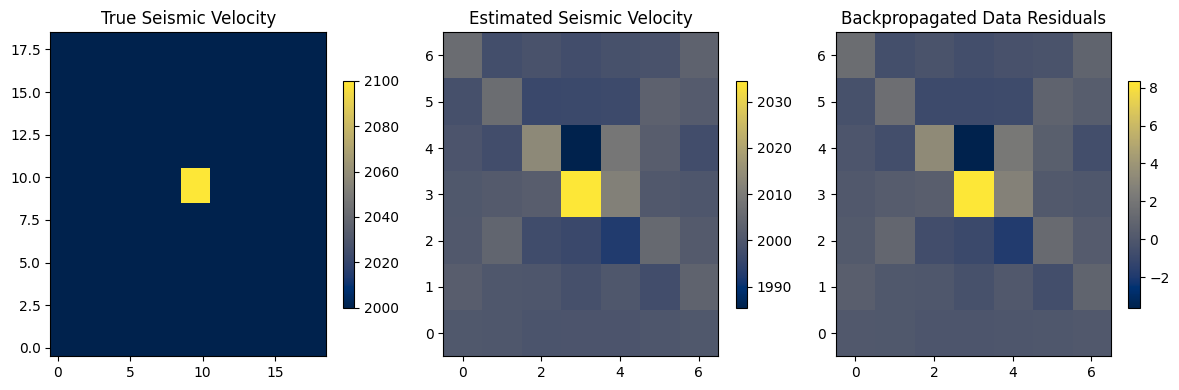

In [ ]:
# calculating the residual and slowness gradient
data_residual_lambda = (G @ s_est_lambda_opt - data_observed)
grad_slowness_lambda = (G.T @ data_residual_lambda).reshape(len(z_grid_inv)- 1, len(x_grid_inv) - 1)

c1 = {
    "Backpropagated Data Residuals": grad_slowness_lambda.T, # Transposed to get correct source-receiver set up on vertical edges of model grid.
    "Estimated Seismic Velocity": c_est_lambda_opt_2d.T
 }

fig = plot_models(c1, 1200)

### **Step 7: {Time Series vs Parameters Comparisons} & Define_Ringtone Function**

The ring_tone function plays an audible bell sound upon completion of long-running computations. It was essential in our experimental workflow for timing execution durations, especially during high-resolution configurations where both ds and ds_inv were small. These settings drastically increased computational demand, sometimes resulting in run times that extended for several hours.

To systematically track performance, we used a stopwatch alongside the ring_tone to manually time each experiment in the configuration table. When the bell sounded, the stopwatch was stopped, and the elapsed time was recorded under the “Run Time” column. This method allowed us to quantify and compare compute times across varying configurations, making ring_tone a pivotal utility in assessing scalability and system responsiveness.

In [ ]:
# Ring Tone Function to signal completion of long-running cell
# Uncomment the last line to play the tone

from IPython.display import Audio

def ring_tone():
    """
    Plays an audible tone to indicate that a long-running computation has finished.
    Useful for batch experiments and high-resolution simulations.
    """
    freq = 432  # Frequency in Hz
    duration = 1  # Duration in seconds
    sr = 44100  # Sampling rate
    t = np.linspace(0, duration, int(sr * duration), endpoint=False)
    wave = 0.5 * np.sin(2 * np.pi * freq * t)  # Generate a sine wave
    return Audio(wave, rate=sr, autoplay=True)

# ring_tone()  # Uncomment this line when ready to play the bell

#Conclusion
---

### Seismic Configuration Results by Varying Inverse Step Length (ds_inv), with Step Length (ds) Fixed at 20. (The table's run/compute time along with the back-propogate and seismic estimate are not currently reflective of reality.  The table is a work in progress, and any current values are just place holders.)

In this experiment, the step length is held constant at **ds = 20**, and the inverse step length (`ds_inv`) is varied to observe how different source-receiver configurations affect solution quality.  While system "runnability" is tracked via "Run Time" column.

| Step Length (ds_inv) | Sources & Receivers | Run Time (s) | Residuals Back-Propagation | Velocity Estimate (1/v) | Computing Power | RRMSE | RMSE |
|---|---|---|---|---|---|---|---|
| 100         | 10 sources, 50 receivers    | 120   | Less desirable   | Desirable | Minimal | 0.00 | 0.00
| 100         | 10 sources, 100 receivers   | 120   | Less desirable   | Desirable | Mid  | 0.00 | 0.00
| 100         | 25 sources, 30 receivers   | 120   | Less desirable   | Desirable | Heavy | 0.00 | 0.00
| 150         | 10 sources, 50 receivers  | 120   | Less desirable   | Desirable | Minimal | 0.00 | 0.00
| 150         | 10 sources, 100 receivers  | 120   | Desirable        | Desirable | Mid | 0.00 | 0.00
| 150         | 25 sources, 30 receivers  | 120   | Desirable        | Desirable | Heavy | 0.00 | 0.00
| 200         | 10 sources, 50 receivers    | 120   | Less desirable   | Desirable| Minimal | 0.00 | 0.00
| 200         | 10 sources, 100 receivers   | 120   | Less desirable   | Desirable| Mid | 0.00 | 0.00
| 200         | 25 sources, 30 receivers   | 120   | Desirable        | Desirable| Heavy | 0.00 | 0.00
| 250         | 10 sources, 50 receivers  | 120   | Desirable        | Desirable| Minimal | 0.00 | 0.00
| 250         | 10 sources, 100 receivers  | 120   | Desirable        | Desirable| Minimal | 0.00 | 0.00
| 250         | 25 sources, 30 receivers  | 120   | Desirable        | Desirable| Mid | 0.00 | 0.00

---


#References
---

Work Cited:

https://doi.org/10.1016/S0065-2687(07)49003-3.

https://en.wikipedia.org/wiki/Reflection_seismology

https://wiki.seg.org/wiki/Seismic_tomography_-_book/en

https://pawbz.github.io/Interactive-Seismology.jl/raytheory/ray-tomography/

https://archive.org/search?query=creator%3A%22Enders+A.+Robinson+and+Sven+Treitel%22
